# AUTOMOBILE INSURANCE CLAIMS ANOMALY PREDICTION

IMPORTING PACKAGES

In [1]:
#pip install scikit-learn==1.4.1.post1

In [2]:
#Loading Packages
import numpy as np #Data processing library
import pandas as pd
import matplotlib.pyplot as plt #data visualization
plt.style.use('seaborn')
import random
import seaborn as sns
import warnings

C:\Users\DELL\AppData\Local\Temp\ipykernel_13392\3007942044.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


LOADING THE DATA

The data was loaded, and the csv file was read.

In [3]:
#Loading the dataset to read it
claims_data = pd.read_excel('Automobile_insurance_claims.xlsx')
claims_data

Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0              Jan                   1  Female        Single  ...   
1              Jan                   4    Male        Single  ...   
2              Nov                   2    Male       Married  ...   
3              Jul                   1    Male       Married  ...   
4              Feb                   2  Female        Single  ...   
...            ...                 ...     ...           ...  ...   
15415          Nov                   5    Male       Married  ...   
15416          Dec                   1    Male       Married  ...   
15417          Dec                   1    Male        Single  ...   
15418          Dec                   2  Female       Married  ...   
15419          Dec                   3    Male        Single  ...   

       AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled WitnessPresent  \
0           3 years          26 to 30                No             No   
1           6 years          31 to 35               Yes             No   
2           7 years          41 to 50                No             No   
3       more than 7          51 to 65               Yes             No   
4           5 years          31 to 35                No             No   
...             ...               ...               ...            ...   
15415       6 years          31 to 35                No             No   
15416       6 years          31 to 35                No             No   
15417       5 years          26 to 30                No             No   
15418       2 years          31 to 35                No             No   
15419       5 years          26 to 30                No             No   

      AgentType  NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
0      External                 none               1 year        3 to 4  1994   
1      External                 none            no change     1 vehicle  1994   
2      External                 none            no change     1 vehicle  1994   
3      External          more than 5            no change     1 vehicle  1994   
4      External                 none            no change     1 vehicle  1994   
...         ...                  ...                  ...           ...   ...   
15415  External                 none            no change     1 vehicle  1996   
15416  External          more than 5            no change        3 to 4  1996   
15417  External               1 to 2            no change     1 vehicle  1996   
15418  External          more than 5            no change     1 vehicle  1996   
15419  External               1 to 2            no change     1 vehicle  1996   

       BasePolicy  
0       Liability  
1       Collision  
2       Collision  
3       Liability  
4       Collision  
...           ...  
15415   Collision  
15416   Liability  
15417   Collision  
15418  All Perils  
15419   Collision  

[15420 rows x 33 columns]

DATAFRAME & STATISTICAL DESCRIBE

To understand the dataset and how it is distributed, the shape, size, head, and tail were generated. The statistical summary of the data was also generated showing count, mean, standard deviation, minimum, maximum and quartiles of each numerical columns. The data types were also generated which showed there were both numerical and categorical features.

In [4]:
#understanding the dataset, the number of rows and columns
print('Shape of data set is:', claims_data.shape)
print('Size of data set is:', claims_data.size)

Shape of data set is: (15420, 33)
Size of data set is: 508860


In [5]:
claims_data.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [6]:
claims_data.tail()

Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
15415          Nov                   5    Male       Married  ...   
15416          Dec                   1    Male       Married  ...   
15417          Dec                   1    Male        Single  ...   
15418          Dec                   2  Female       Married  ...   
15419          Dec                   3    Male        Single  ...   

       AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled WitnessPresent  \
15415       6 years          31 to 35                No             No   
15416       6 years          31 to 35                No             No   
15417       5 years          26 to 30                No             No   
15418       2 years          31 to 35                No             No   
15419       5 years          26 to 30                No             No   

      AgentType  NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
15415  External                 none            no change     1 vehicle  1996   
15416  External          more than 5            no change        3 to 4  1996   
15417  External               1 to 2            no change     1 vehicle  1996   
15418  External          more than 5            no change     1 vehicle  1996   
15419  External               1 to 2            no change     1 vehicle  1996   

       BasePolicy  
15415   Collision  
15416   Liability  
15417   Collision  
15418  All Perils  
15419   Collision  

[5 rows x 33 columns]

In [7]:
#Checking the analysis (Statistical measures) of the data
claims_data.describe()

WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min        1.000000      1.000000    300.000000      1.000000   1994.000000  
25%     3855.750000      5.000000    400.000000      1.000000   1994.000000  
50%     7710.500000      8.000000    400.000000      2.000000   1995.000000  
75%    11565.250000     12.000000    400.000000      3.000000   1996.000000  
max    15420.000000     16.000000    700.000000      4.000000   1996.000000

In [8]:
#checking a quick description of the data types
claims_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

DATA PREPROCESSING

The data was checked for duplicates and no duplicates were found. Missing values were also not found in the data.

In [9]:
#Checking the data for duplicates
claims_data.duplicated().sum()

0

In [10]:
#Checking the data for missing values
missing_values = claims_data.isna().sum()
print(missing_values)

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


DATA EXPLORATION AND VISUALIZATION

An exploratory analysis was performed to gain a better understanding and identify patterns in the data. It showed that 9 columns were numerical and 24 were categorical. Each column had unique values

In [11]:
# Checking the data column names
claims_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [12]:
#checking for number of columns with numerical data
num=claims_data.select_dtypes(include=np.number).columns

len(num)

9

In [13]:
#checking the unique values in the numerical columns
for i in num:
    print('The number of unique values in', i, 'are:', claims_data.loc[:,i].nunique())

The number of unique values in WeekOfMonth are: 5
The number of unique values in WeekOfMonthClaimed are: 5
The number of unique values in Age are: 66
The number of unique values in FraudFound_P are: 2
The number of unique values in PolicyNumber are: 15420
The number of unique values in RepNumber are: 16
The number of unique values in Deductible are: 4
The number of unique values in DriverRating are: 4
The number of unique values in Year are: 3


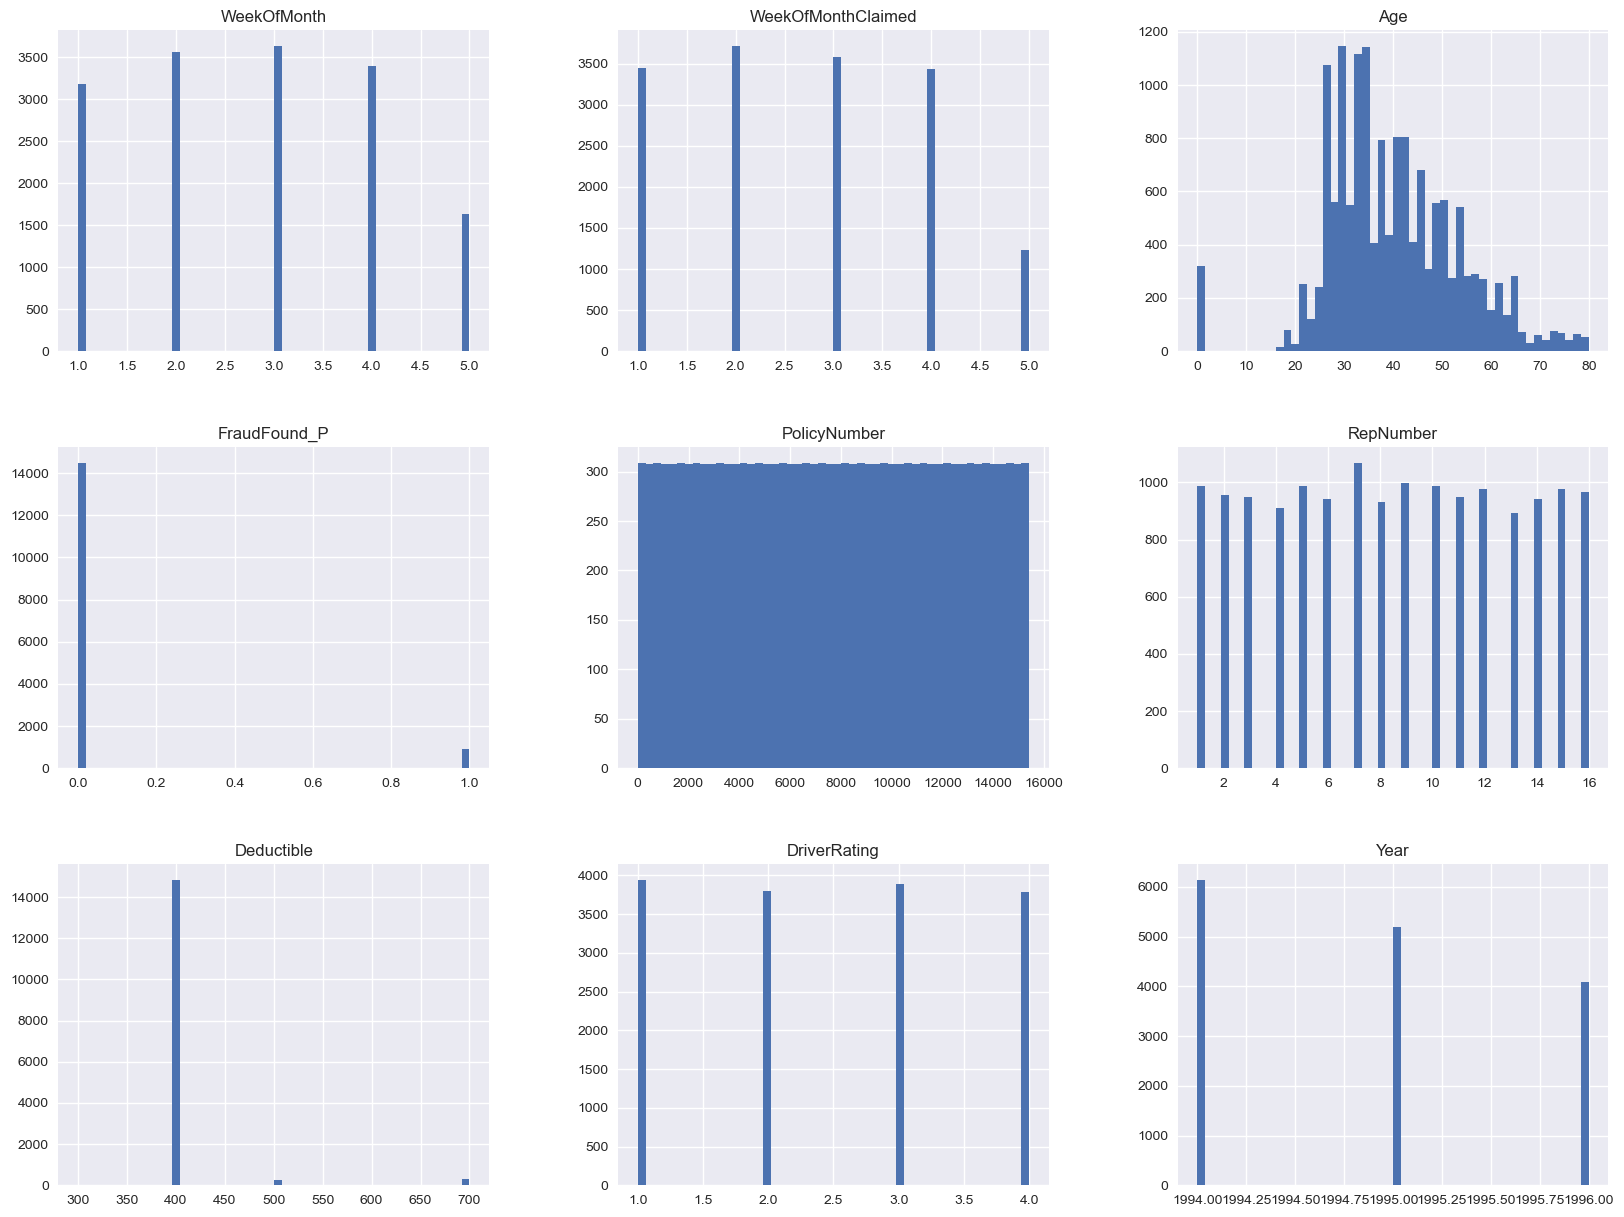

In [14]:
#visualizing the numerical columns
#histogram for each numerical columns
claims_data.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
#checking for the number of columns with categorical data
cat=claims_data.select_dtypes(include='object').columns
len(cat)

24

In [16]:
#checking the unique values in the categorical columns
for i in cat:
    print('The number of unique values in', i, 'are:', claims_data.loc[:,i].nunique())

The number of unique values in Month are: 12
The number of unique values in DayOfWeek are: 7
The number of unique values in Make are: 19
The number of unique values in AccidentArea are: 2
The number of unique values in DayOfWeekClaimed are: 8
The number of unique values in MonthClaimed are: 13
The number of unique values in Sex are: 2
The number of unique values in MaritalStatus are: 4
The number of unique values in Fault are: 2
The number of unique values in PolicyType are: 9
The number of unique values in VehicleCategory are: 3
The number of unique values in VehiclePrice are: 6
The number of unique values in Days_Policy_Accident are: 5
The number of unique values in Days_Policy_Claim are: 4
The number of unique values in PastNumberOfClaims are: 4
The number of unique values in AgeOfVehicle are: 8
The number of unique values in AgeOfPolicyHolder are: 9
The number of unique values in PoliceReportFiled are: 2
The number of unique values in WitnessPresent are: 2
The number of unique valu

UNIVARIATE ANALYSIS

A visual analysis was generated to examine each numerical and categorical column to understand the characteristics and patterns in them.

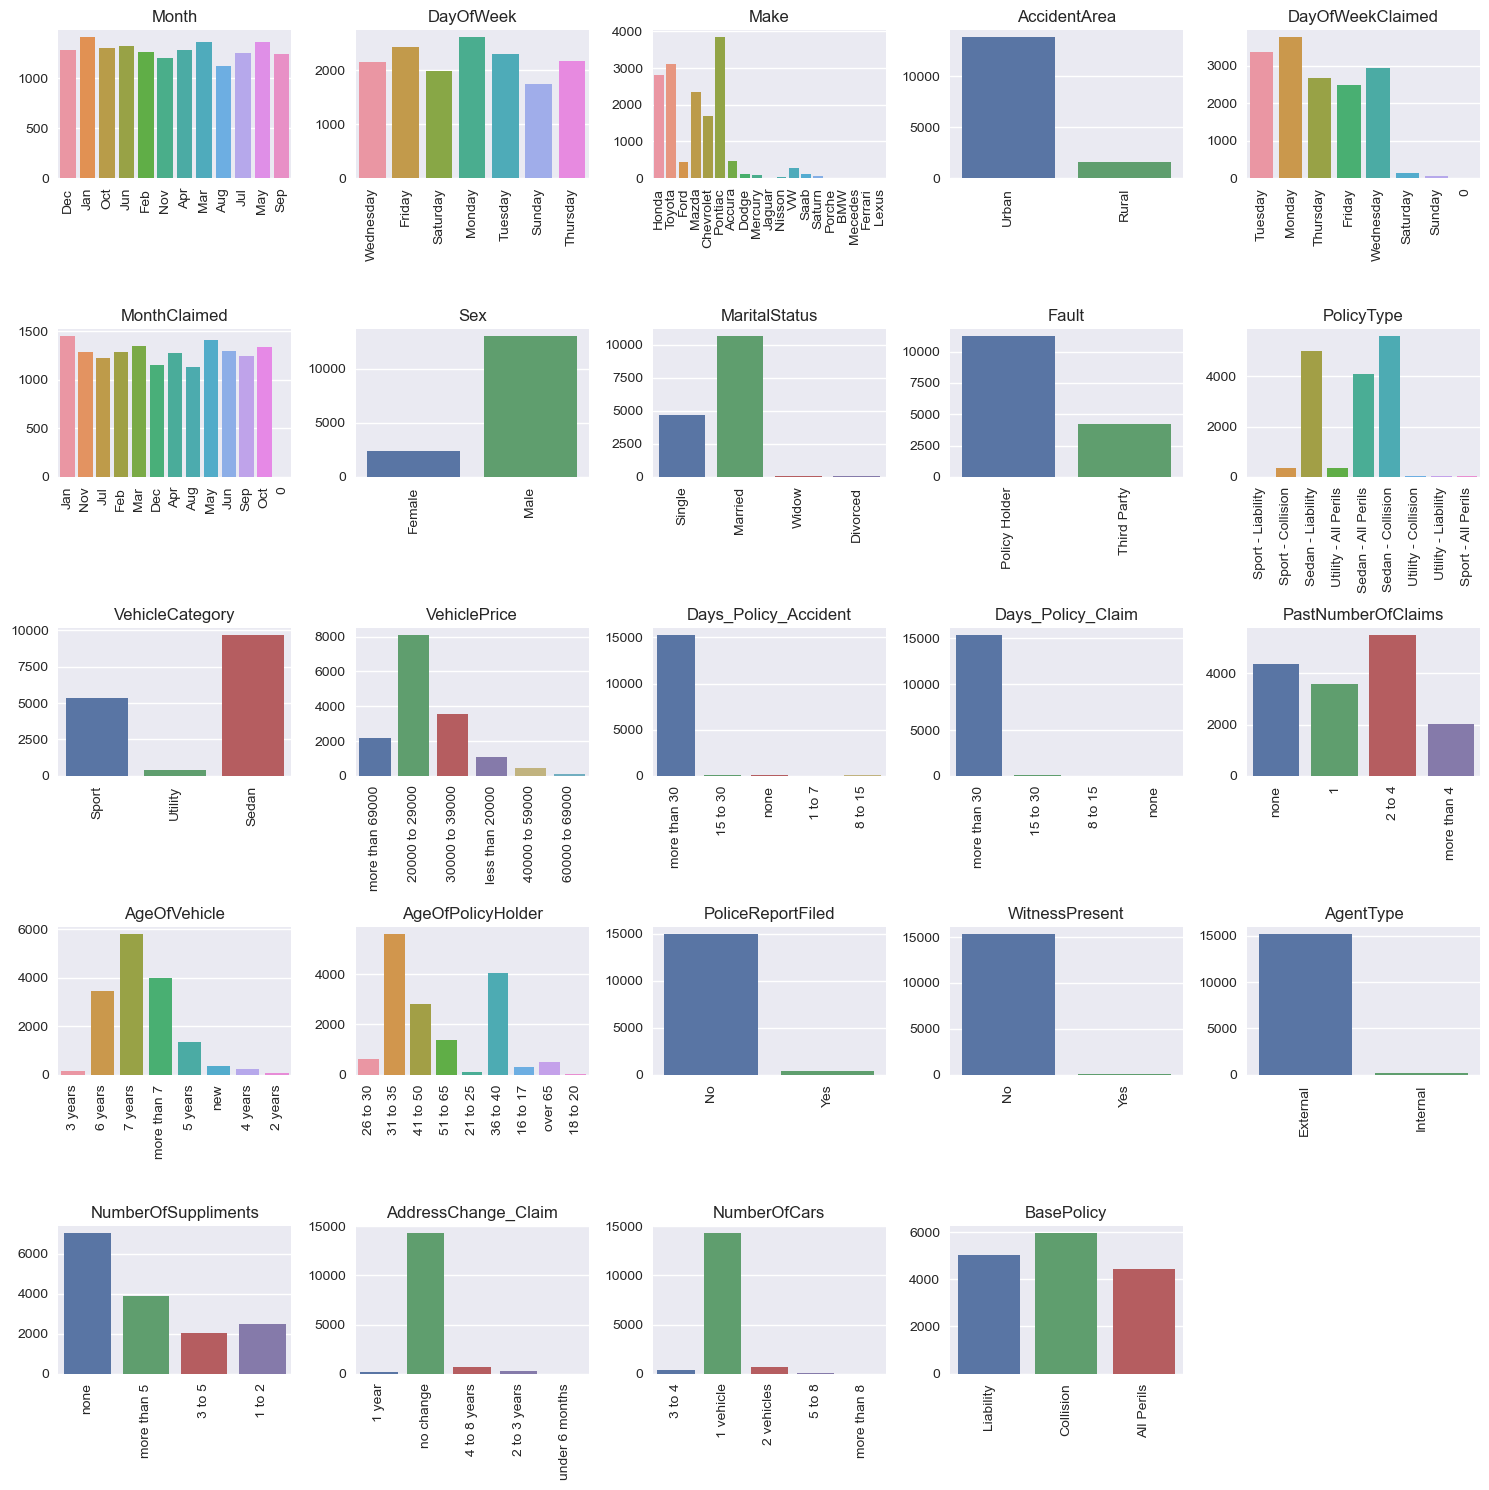

In [17]:
#visualizing categorical columns
num_plots = len(cat)
num_cols = 5
num_rows = num_plots // num_cols + int(num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(cat):
    sns.countplot(x=col, data=claims_data, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelrotation=90)
for i in range(num_plots, num_rows*num_cols):
    axes[i].set_visible(False)
    
fig.tight_layout()
plt.show()

The target variable(Not fraud/normal = 0 & fraud/abnormal = 1) was visualized to give a better understanding of the distribution of data between them. It was observed that there was an issue of class imbalance in the data. This would be looked at later on during this project by balancing the data.

In [18]:
#To visualize and understand the target variable, it was converted to categorical.
#FraudFound_P(Not fraud= normal behaviour & Fraud= abnormal behaviour)
change={1:'Abnormal', 0: 'Normal'}
claims_data['FraudFound_P']= claims_data['FraudFound_P'].replace(change)

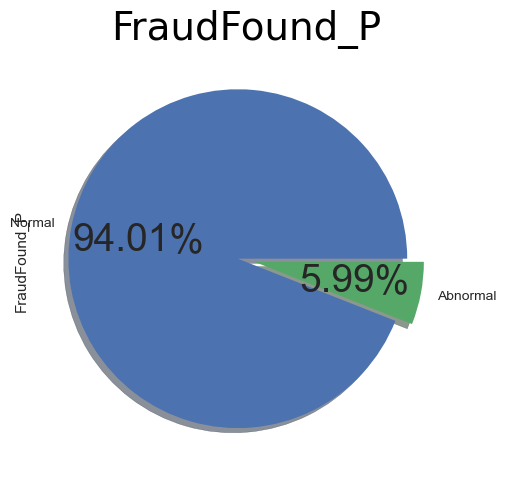

In [19]:
#visualizing The target variable
#FraudFound_P(Not fraud/0= normal behaviour & Fraud/1= Anormaly behaviour)
plt.rcParams.update({'font.size': 28})
claims_data['FraudFound_P'].value_counts().plot.pie(explode=[0.05, 0.05],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('FraudFound_P',color='Black',loc='center',font='DejaVu Sans');

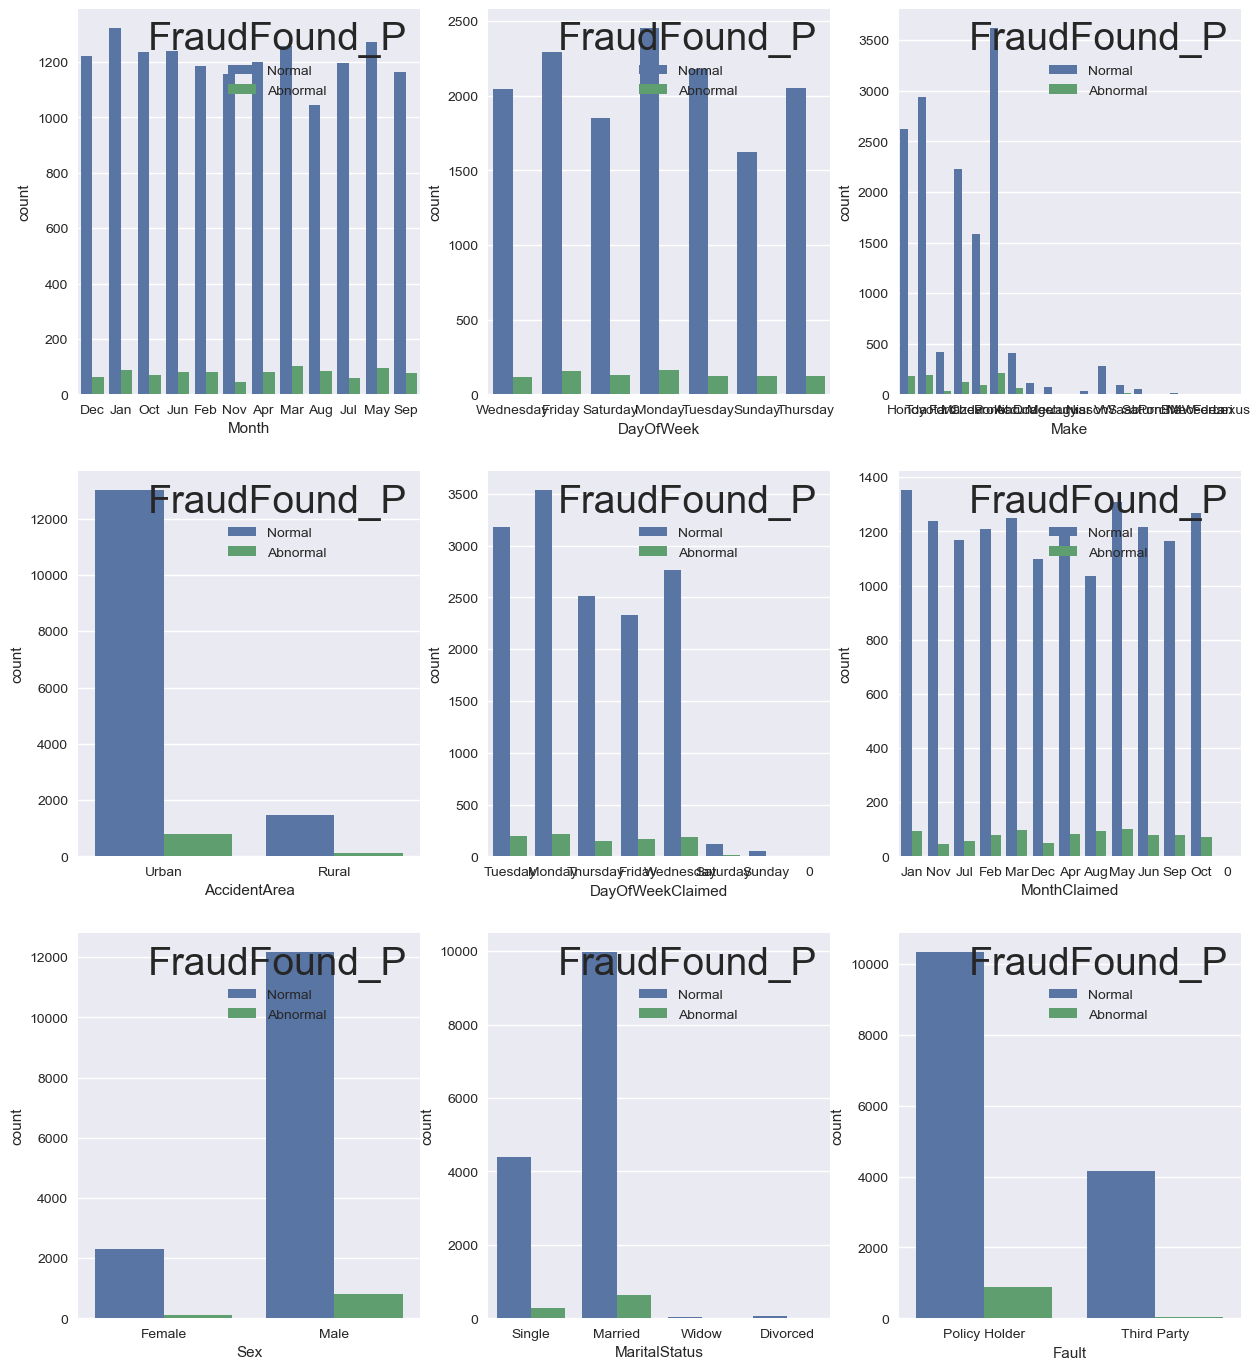

In [20]:
#Exploratory Analysis on Feature variables and target variable
#data distribution of Status according to  Categorical columns
cat_cols = ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault']

fig, ax = plt.subplots(3, 3, figsize = (15, 17))
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=claims_data, ax=ax[i // 3, i % 3], hue = "FraudFound_P")
plt.show()

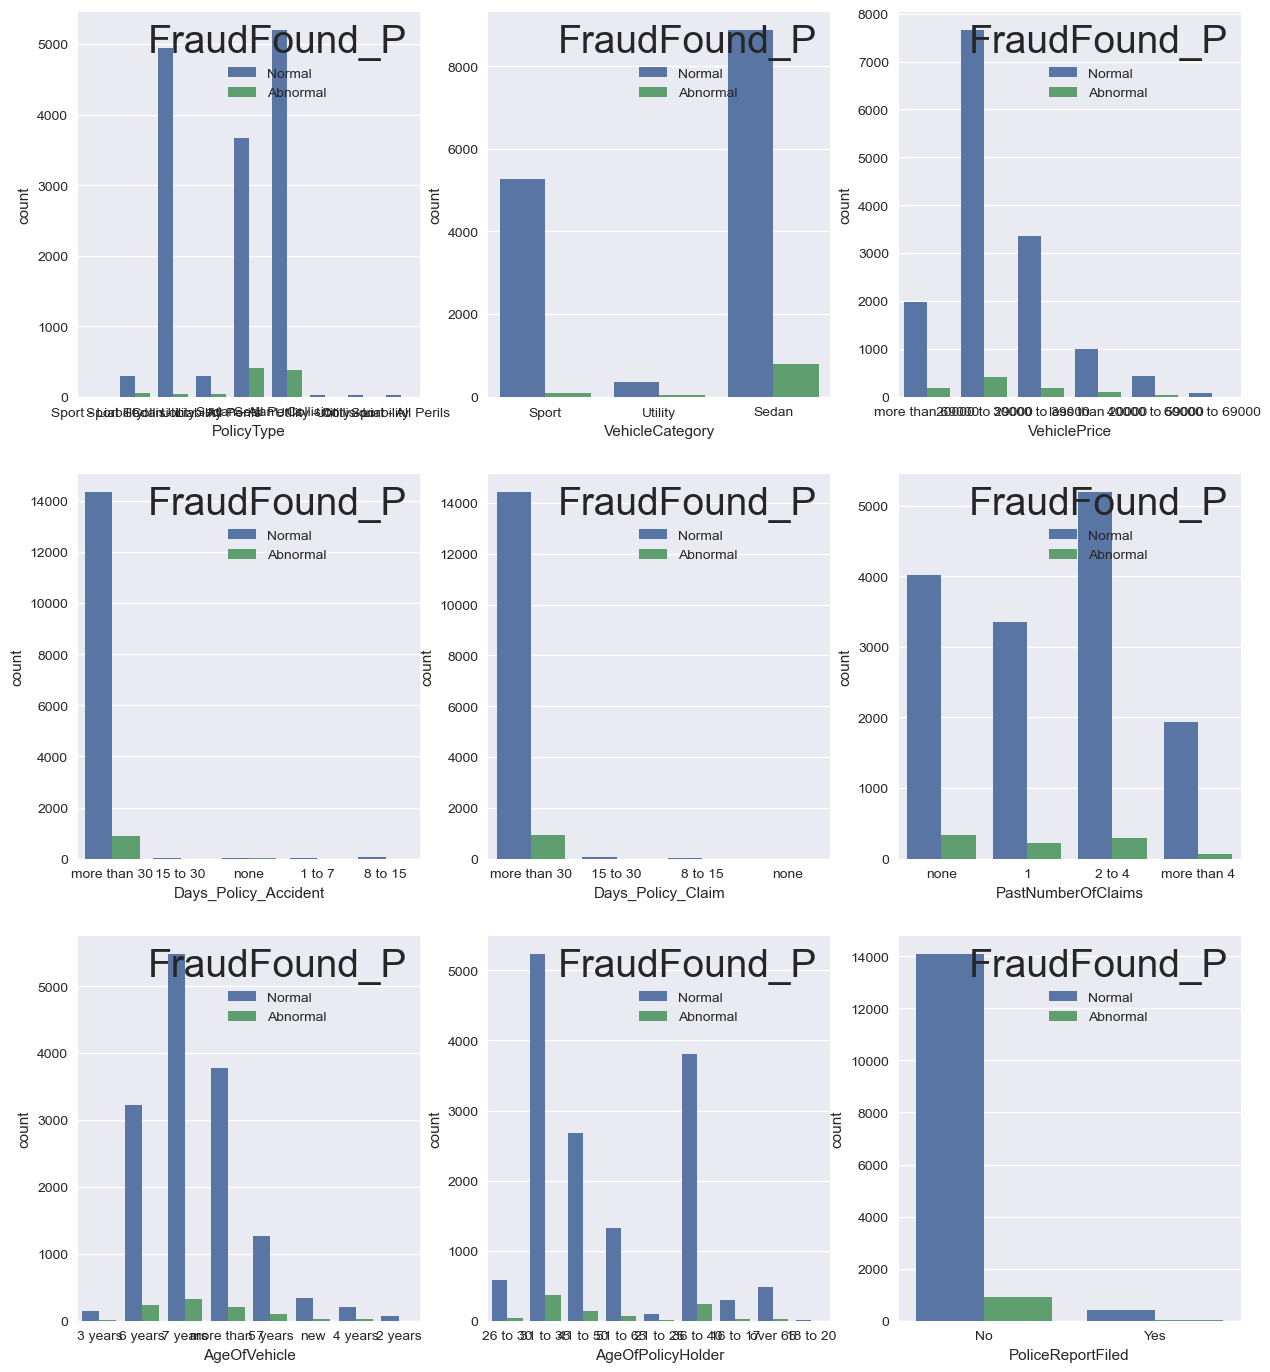

In [21]:
#Exploratory Analysis on Feature variables and target variable
#data distribution of Status according to  Categorical columns
cat_cols2 = ['PolicyType','VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', ]

fig, ax = plt.subplots(3, 3, figsize = (15, 17))
for i, col in enumerate(cat_cols2):
    sns.countplot(x=col, data=claims_data, ax=ax[i // 3, i % 3], hue = "FraudFound_P")
plt.show()

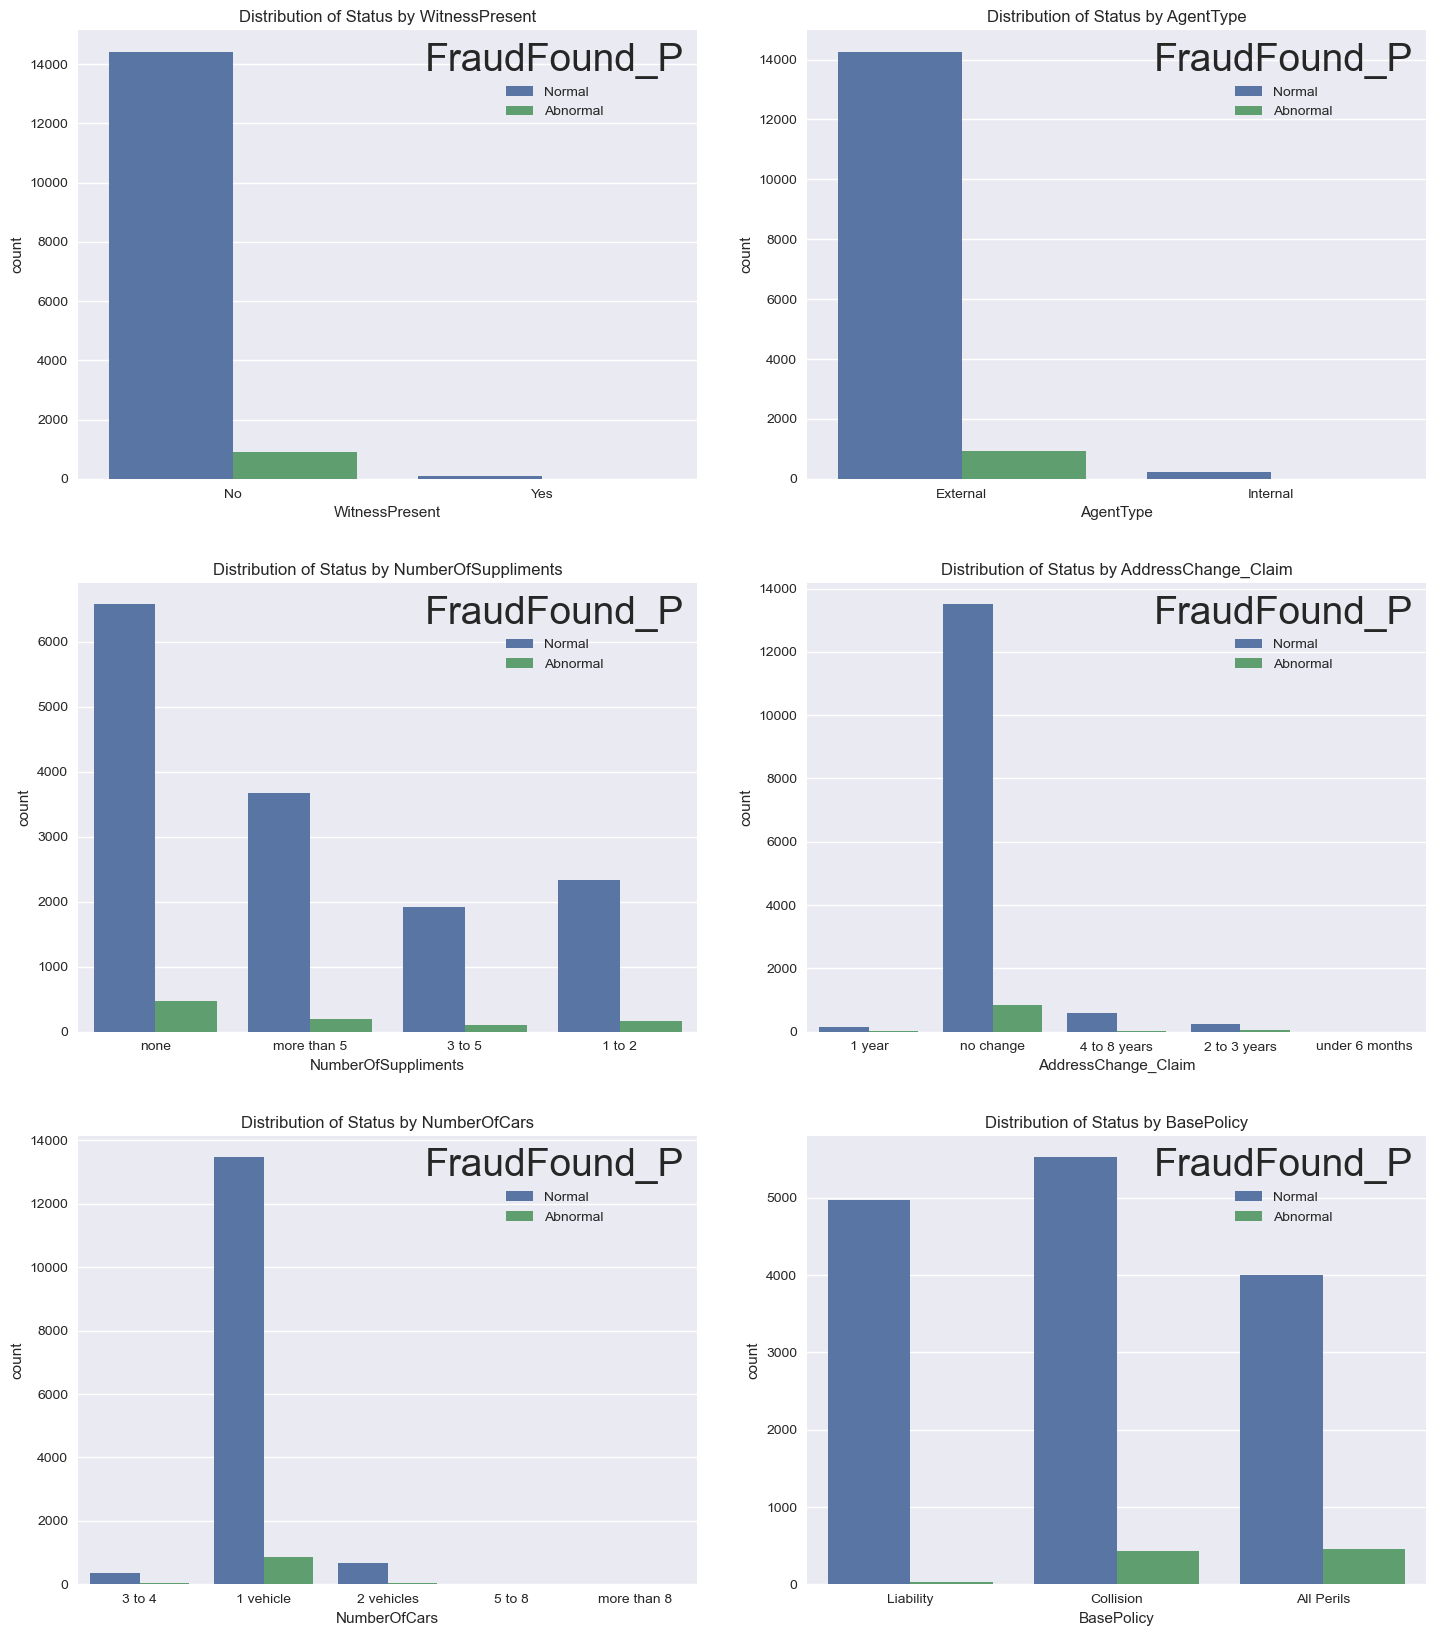

In [22]:
#Exploratory Analysis on Feature variables and target variable
#data distribution of Status according to  Categorical columns
cat_cols3 = ['WitnessPresent', 'AgentType','NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars','BasePolicy', ]

fig, ax = plt.subplots(3, 2, figsize=(15, 17))

# Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()

# Loop through each categorical column
for i, col in enumerate(cat_cols3):
    sns.countplot(x=col, data=claims_data, ax=ax[i], hue="FraudFound_P")
    ax[i].set_title(f'Distribution of Status by {col}')  # Set subplot title
    ax[i].legend(title='FraudFound_P')  # Add legend with title

# Adjust layout and spacing
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

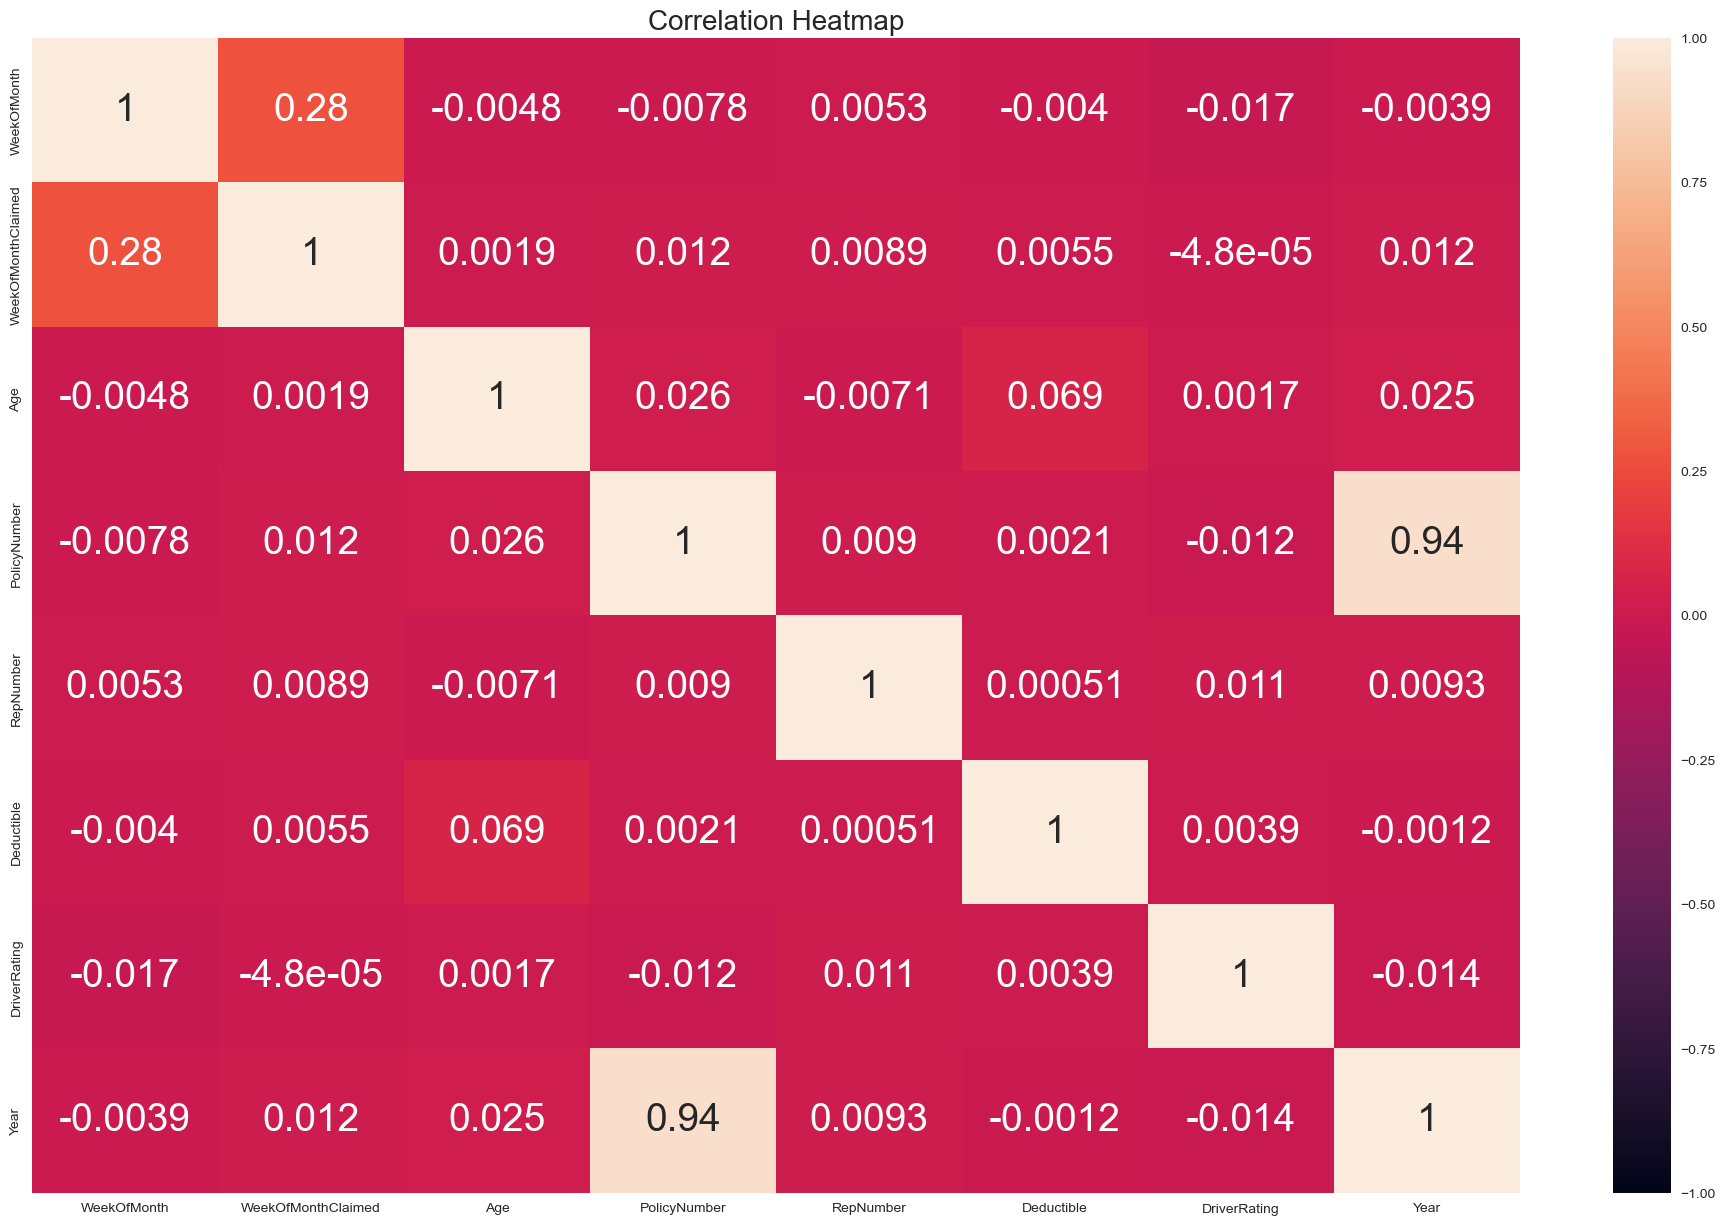

In [23]:
#A correlation heatmap to show the correlation between numerical columns
num_cols=['WeekOfMonth','WeekOfMonthClaimed','Age', 'FraudFound_P','PolicyNumber',
           'RepNumber','Deductible','DriverRating','Year']

corr_matrix = claims_data[num_cols].corr(numeric_only=True)
plt.figure(figsize=(24,15))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontsize=20)

FEATURE ENGINEERING

To prepare the data for model implementation, Feature encoding was used to convert 24 categorical columns to numerical formats The target variable was also converted back to numerical values.

In [24]:
#converting the target variable back to a numerical value
change={'Abnormal':1,'Normal':0}
claims_data['FraudFound_P']= claims_data['FraudFound_P'].replace(change)

In [25]:
#Encoding
##Converting all values to numerical values to be used in the machine learning model
cat

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [26]:
# Converting Month to numerical value
claims_data['Month'].replace('Jan', 1,inplace=True)
claims_data['Month'].replace('Feb', 2,inplace=True)
claims_data['Month'].replace('Mar', 3,inplace=True)
claims_data['Month'].replace('Apr', 4,inplace=True)
claims_data['Month'].replace('May', 5,inplace=True)
claims_data['Month'].replace('Jun', 6,inplace=True)
claims_data['Month'].replace('Jul', 7,inplace=True)
claims_data['Month'].replace('Aug', 8,inplace=True)
claims_data['Month'].replace('Sep', 9,inplace=True)
claims_data['Month'].replace('Oct', 10,inplace=True)
claims_data['Month'].replace('Nov', 11,inplace=True)
claims_data['Month'].replace('Dec', 12,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0     12            5  Wednesday   Honda        Urban          Tuesday   
1      1            3  Wednesday   Honda        Urban           Monday   
2     10            5     Friday   Honda        Urban         Thursday   
3      6            2   Saturday  Toyota        Rural           Friday   
4      1            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [27]:
# Converting DayofWeek to numerical value
claims_data['DayOfWeek'].replace('Sunday', 0,inplace=True)
claims_data['DayOfWeek'].replace('Monday', 1,inplace=True)
claims_data['DayOfWeek'].replace('Tuesday', 2,inplace=True)
claims_data['DayOfWeek'].replace('Wednesday', 3,inplace=True)
claims_data['DayOfWeek'].replace('Thursday', 4,inplace=True)
claims_data['DayOfWeek'].replace('Friday', 5,inplace=True)
claims_data['DayOfWeek'].replace('Saturday', 6,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0     12            5          3   Honda        Urban          Tuesday   
1      1            3          3   Honda        Urban           Monday   
2     10            5          5   Honda        Urban         Thursday   
3      6            2          6  Toyota        Rural           Friday   
4      1            5          1   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [28]:
claims_data['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [29]:
# Preparing Make Column to some Denoting values
claims_data['Make'].replace('Honda', 0,inplace=True)
claims_data['Make'].replace('Toyota', 1,inplace=True)
claims_data['Make'].replace('Ford', 2,inplace=True)
claims_data['Make'].replace('Mazda', 3,inplace=True)
claims_data['Make'].replace('Chevrolet', 4,inplace=True)
claims_data['Make'].replace('Pontiac', 5,inplace=True)
claims_data['Make'].replace('Accura', 6,inplace=True)
claims_data['Make'].replace('Dodge', 7,inplace=True)
claims_data['Make'].replace('Mercury', 8,inplace=True)
claims_data['Make'].replace('Jaguar', 9,inplace=True)
claims_data['Make'].replace('Nisson', 10,inplace=True)
claims_data['Make'].replace('VW', 11,inplace=True)
claims_data['Make'].replace('Saab', 12,inplace=True)
claims_data['Make'].replace('Saturn', 13,inplace=True)
claims_data['Make'].replace('Porche', 14,inplace=True)
claims_data['Make'].replace('BMW', 15,inplace=True)
claims_data['Make'].replace('Mecedes', 16,inplace=True)
claims_data['Make'].replace('Ferrari', 17,inplace=True)
claims_data['Make'].replace('Lexus', 18,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make AccidentArea DayOfWeekClaimed  \
0     12            5          3     0        Urban          Tuesday   
1      1            3          3     0        Urban           Monday   
2     10            5          5     0        Urban         Thursday   
3      6            2          6     1        Rural           Friday   
4      1            5          1     0        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [30]:
# Converting AccidentArea to numerical value
claims_data['AccidentArea'].replace('Urban', 0,inplace=True)
claims_data['AccidentArea'].replace('Rural', 1,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea DayOfWeekClaimed  \
0     12            5          3     0             0          Tuesday   
1      1            3          3     0             0           Monday   
2     10            5          5     0             0         Thursday   
3      6            2          6     1             1           Friday   
4      1            5          1     0             0          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [31]:
# Converting DayOfWeekClaimed to numerical value
claims_data['DayOfWeekClaimed'].replace('Sunday', 0,inplace=True)
claims_data['DayOfWeekClaimed'].replace('Monday', 1,inplace=True)
claims_data['DayOfWeekClaimed'].replace('Tuesday', 2,inplace=True)
claims_data['DayOfWeekClaimed'].replace('Wednesday', 3,inplace=True)
claims_data['DayOfWeekClaimed'].replace('Thursday', 4,inplace=True)
claims_data['DayOfWeekClaimed'].replace('Friday', 5,inplace=True)
claims_data['DayOfWeekClaimed'].replace('Saturday', 6,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [32]:
# Converting MonthClaimed to numerical value
claims_data['MonthClaimed'].replace('Jan', 1,inplace=True)
claims_data['MonthClaimed'].replace('Feb', 2,inplace=True)
claims_data['MonthClaimed'].replace('Mar', 3,inplace=True)
claims_data['MonthClaimed'].replace('Apr', 4,inplace=True)
claims_data['MonthClaimed'].replace('May', 5,inplace=True)
claims_data['MonthClaimed'].replace('Jun', 6,inplace=True)
claims_data['MonthClaimed'].replace('Jul', 7,inplace=True)
claims_data['MonthClaimed'].replace('Aug', 8,inplace=True)
claims_data['MonthClaimed'].replace('Sep', 9,inplace=True)
claims_data['MonthClaimed'].replace('Oct', 10,inplace=True)
claims_data['MonthClaimed'].replace('Nov', 11,inplace=True)
claims_data['MonthClaimed'].replace('Dec', 12,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0             1                   1  Female        Single  ...       3 years   
1             1                   4    Male        Single  ...       6 years   
2            11                   2    Male       Married  ...       7 years   
3             7                   1    Male       Married  ...   more than 7   
4             2                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [33]:
# Converting sex to numerical value
claims_data['Sex'].replace('Female', 0,inplace=True)
claims_data['Sex'].replace('Male', 1,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0        Single  ...       3 years   
1             1                   4    1        Single  ...       6 years   
2            11                   2    1       Married  ...       7 years   
3             7                   1    1       Married  ...   more than 7   
4             2                   2    0        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [34]:
# Converting marital status to numerical value
claims_data['MaritalStatus'].replace('Widow', 0,inplace=True)
claims_data['MaritalStatus'].replace('Single', 1,inplace=True)
claims_data['MaritalStatus'].replace('Married', 2,inplace=True)
claims_data['MaritalStatus'].replace('Divorced', 3,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...       3 years   
1             1                   4    1              1  ...       6 years   
2            11                   2    1              2  ...       7 years   
3             7                   1    1              2  ...   more than 7   
4             2                   2    0              1  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [35]:
# Converting fault to numerical value
claims_data['Fault'].replace('Policy Holder', 0,inplace=True)
claims_data['Fault'].replace('Third Party', 1,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...       3 years   
1             1                   4    1              1  ...       6 years   
2            11                   2    1              2  ...       7 years   
3             7                   1    1              2  ...   more than 7   
4             2                   2    0              1  ...       5 years   

   AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0           26 to 30                No             No  External   
1           31 to 35               Yes             No  External   
2           41 to 50                No             No  External   
3           51 to 65               Yes             No  External   
4           31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [36]:
# Converting policy type to numerical value
claims_data['VehicleCategory'].replace('Sport', 0,inplace=True)
claims_data['VehicleCategory'].replace('Sedan', 1,inplace=True)
claims_data['VehicleCategory'].replace('Utility', 2,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...       3 years   
1             1                   4    1              1  ...       6 years   
2            11                   2    1              2  ...       7 years   
3             7                   1    1              2  ...   more than 7   
4             2                   2    0              1  ...       5 years   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent AgentType  \
0           26 to 30                No              No  External   
1           31 to 35               Yes              No  External   
2           41 to 50                No              No  External   
3           51 to 65               Yes              No  External   
4           31 to 35                No              No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [37]:
claims_data['VehiclePrice'].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [38]:
# Grouping VehiclePrice to numerical Values by taking Average of Range
claims_data['VehiclePrice'].replace('less than 20000', 15000,inplace=True)
claims_data['VehiclePrice'].replace('20000 to 29000', 24500,inplace=True)
claims_data['VehiclePrice'].replace('30000 to 39000', 34500,inplace=True)
claims_data['VehiclePrice'].replace('40000 to 59000', 44500,inplace=True)
claims_data['VehiclePrice'].replace('60000 to 69000', 64500,inplace=True)
claims_data['VehiclePrice'].replace('more than 69000', 74500,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...       3 years   
1             1                   4    1              1  ...       6 years   
2            11                   2    1              2  ...       7 years   
3             7                   1    1              2  ...   more than 7   
4             2                   2    0              1  ...       5 years   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent  AgentType  \
0           26 to 30                No              No   External   
1           31 to 35               Yes              No   External   
2           41 to 50                No              No   External   
3           51 to 65               Yes              No   External   
4           31 to 35                No              No   External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [39]:
claims_data['Days_Policy_Accident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [40]:
# Grouping Days policy accident to numerical Values by taking Average of Range
claims_data['Days_Policy_Accident'].replace('1 to 7', 4,inplace=True)
claims_data['Days_Policy_Accident'].replace('8 to 15', 11.5,inplace=True)
claims_data['Days_Policy_Accident'].replace('15 to 30', 22.5,inplace=True)
claims_data['Days_Policy_Accident'].replace('more than 30', 38,inplace=True)
claims_data['Days_Policy_Accident'].replace('none', 0,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...       3 years   
1             1                   4    1              1  ...       6 years   
2            11                   2    1              2  ...       7 years   
3             7                   1    1              2  ...   more than 7   
4             2                   2    0              1  ...       5 years   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent  AgentType  \
0           26 to 30                No              No   External   
1           31 to 35               Yes              No   External   
2           41 to 50                No              No   External   
3           51 to 65               Yes              No   External   
4           31 to 35                No              No   External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [41]:
claims_data['Days_Policy_Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [42]:
# Grouping Days policy claim to numerical Values by taking Average of Range
claims_data['Days_Policy_Claim'].replace('none', 0,inplace=True)
claims_data['Days_Policy_Claim'].replace('8 to 15', 11.5,inplace=True)
claims_data['Days_Policy_Claim'].replace('15 to 30', 22.5,inplace=True)
claims_data['Days_Policy_Claim'].replace('more than 30', 38,inplace=True)
claims_data['Days_Policy_Accident'].unique()

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...       3 years   
1             1                   4    1              1  ...       6 years   
2            11                   2    1              2  ...       7 years   
3             7                   1    1              2  ...   more than 7   
4             2                   2    0              1  ...       5 years   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent  AgentType  \
0           26 to 30                No              No   External   
1           31 to 35               Yes              No   External   
2           41 to 50                No              No   External   
3           51 to 65               Yes              No   External   
4           31 to 35                No              No   External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [43]:
claims_data['PastNumberOfClaims'].unique()

array(['none', 1, '2 to 4', 'more than 4'], dtype=object)

In [44]:
# Grouping PastNumberOfClaims to numerical Values by taking Average of Range
claims_data['PastNumberOfClaims'].replace('none', 0,inplace=True)
claims_data['PastNumberOfClaims'].replace('1', 1,inplace=True)
claims_data['PastNumberOfClaims'].replace('2 to 4', 3,inplace=True)
claims_data['PastNumberOfClaims'].replace('more than 4', 7,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...       3 years   
1             1                   4    1              1  ...       6 years   
2            11                   2    1              2  ...       7 years   
3             7                   1    1              2  ...   more than 7   
4             2                   2    0              1  ...       5 years   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent  AgentType  \
0           26 to 30                No              No   External   
1           31 to 35               Yes              No   External   
2           41 to 50                No              No   External   
3           51 to 65               Yes              No   External   
4           31 to 35                No              No   External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [45]:
claims_data['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [46]:
#Grouping AgeOfVehicle to numerical Values by taking Average of Range
claims_data['AgeOfVehicle'].replace('3 years', 3,inplace=True)
claims_data['AgeOfVehicle'].replace('6 years', 6,inplace=True)
claims_data['AgeOfVehicle'].replace('7 years', 7,inplace=True)
claims_data['AgeOfVehicle'].replace('5 years', 5,inplace=True)
claims_data['AgeOfVehicle'].replace('new', 0,inplace=True)
claims_data['AgeOfVehicle'].replace('more than 7', 10,inplace=True)
claims_data['AgeOfVehicle'].replace('4 years', 4,inplace=True)
claims_data['AgeOfVehicle'].replace('2 years', 2,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...             3   
1             1                   4    1              1  ...             6   
2            11                   2    1              2  ...             7   
3             7                   1    1              2  ...            10   
4             2                   2    0              1  ...             5   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent  AgentType  \
0           26 to 30                No              No   External   
1           31 to 35               Yes              No   External   
2           41 to 50                No              No   External   
3           51 to 65               Yes              No   External   
4           31 to 35                No              No   External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [47]:
claims_data['AgeOfPolicyHolder'].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [48]:
#Grouping AgeOfpolicyholder to numerical Values by taking Average of Range
claims_data['AgeOfPolicyHolder'].replace('16 to 17', 16.5,inplace=True)
claims_data['AgeOfPolicyHolder'].replace('18 to 20', 19,inplace=True)
claims_data['AgeOfPolicyHolder'].replace('21 to 25', 23,inplace=True)
claims_data['AgeOfPolicyHolder'].replace('26 to 30', 28,inplace=True)
claims_data['AgeOfPolicyHolder'].replace('31 to 35', 33,inplace=True)
claims_data['AgeOfPolicyHolder'].replace('36 to 40', 38,inplace=True)
claims_data['AgeOfPolicyHolder'].replace('41 to 50', 45.5,inplace=True)
claims_data['AgeOfPolicyHolder'].replace('51 to 65', 58,inplace=True)
claims_data['AgeOfPolicyHolder'].replace('over 65', 69,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...             3   
1             1                   4    1              1  ...             6   
2            11                   2    1              2  ...             7   
3             7                   1    1              2  ...            10   
4             2                   2    0              1  ...             5   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent  AgentType  \
0               28.0                No              No   External   
1               33.0               Yes              No   External   
2               45.5                No              No   External   
3               58.0               Yes              No   External   
4               33.0                No              No   External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [49]:
# Converting policereportfiled to numerical value
claims_data['PoliceReportFiled'].replace('No', 0,inplace=True)
claims_data['PoliceReportFiled'].replace('Yes', 1,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...             3   
1             1                   4    1              1  ...             6   
2            11                   2    1              2  ...             7   
3             7                   1    1              2  ...            10   
4             2                   2    0              1  ...             5   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent  AgentType  \
0               28.0                 0              No   External   
1               33.0                 1              No   External   
2               45.5                 0              No   External   
3               58.0                 1              No   External   
4               33.0                 0              No   External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [50]:
# Converting WitnessPresent to numerical value
claims_data['WitnessPresent'].replace('No', 0,inplace=True)
claims_data['WitnessPresent'].replace('Yes', 1,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...             3   
1             1                   4    1              1  ...             6   
2            11                   2    1              2  ...             7   
3             7                   1    1              2  ...            10   
4             2                   2    0              1  ...             5   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent  AgentType  \
0               28.0                 0               0   External   
1               33.0                 1               0   External   
2               45.5                 0               0   External   
3               58.0                 1               0   External   
4               33.0                 0               0   External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [51]:
# Converting AgentType to numerical value
claims_data['AgentType'].replace('External', 0,inplace=True)
claims_data['AgentType'].replace('Internal', 1,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...             3   
1             1                   4    1              1  ...             6   
2            11                   2    1              2  ...             7   
3             7                   1    1              2  ...            10   
4             2                   2    0              1  ...             5   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent  AgentType  \
0               28.0                 0               0          0   
1               33.0                 1               0          0   
2               45.5                 0               0          0   
3               58.0                 1               0          0   
4               33.0                 0               0          0   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [52]:
claims_data['NumberOfSuppliments'].unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [53]:
#Grouping NumberOfSuppliments to numerical Values by taking Average of Range
claims_data['NumberOfSuppliments'].replace('none', 0,inplace=True)
claims_data['NumberOfSuppliments'].replace('1 to 2', 1.5,inplace=True)
claims_data['NumberOfSuppliments'].replace('3 to 5', 4,inplace=True)
claims_data['NumberOfSuppliments'].replace('more than 5', 6,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...             3   
1             1                   4    1              1  ...             6   
2            11                   2    1              2  ...             7   
3             7                   1    1              2  ...            10   
4             2                   2    0              1  ...             5   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent  AgentType  \
0               28.0                 0               0          0   
1               33.0                 1               0          0   
2               45.5                 0               0          0   
3               58.0                 1               0          0   
4               33.0                 0               0          0   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                  0.0               1 year        3 to 4  1994   Liability  
1                  0.0            no change     1 vehicle  1994   Collision  
2                  0.0            no change     1 vehicle  1994   Collision  
3                  6.0            no change     1 vehicle  1994   Liability  
4                  0.0            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [54]:
claims_data['AddressChange_Claim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [55]:
#Grouping AddressChange_Claim to numerical Values by taking Average of Range
claims_data['AddressChange_Claim'].replace('1 year', 1,inplace=True)
claims_data['AddressChange_Claim'].replace('no change', 0,inplace=True)
claims_data['AddressChange_Claim'].replace('4 to 8 years', 6,inplace=True)
claims_data['AddressChange_Claim'].replace('2 to 3 years', 2.5,inplace=True)
claims_data['AddressChange_Claim'].replace('under 6 months', 0.3,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...             3   
1             1                   4    1              1  ...             6   
2            11                   2    1              2  ...             7   
3             7                   1    1              2  ...            10   
4             2                   2    0              1  ...             5   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent  AgentType  \
0               28.0                 0               0          0   
1               33.0                 1               0          0   
2               45.5                 0               0          0   
3               58.0                 1               0          0   
4               33.0                 0               0          0   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                  0.0                  1.0        3 to 4  1994   Liability  
1                  0.0                  0.0     1 vehicle  1994   Collision  
2                  0.0                  0.0     1 vehicle  1994   Collision  
3                  6.0                  0.0     1 vehicle  1994   Liability  
4                  0.0                  0.0     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [56]:
claims_data['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [57]:
#Grouping AddressChange_Claim to numerical Values by taking Average of Range 
claims_data['NumberOfCars'].replace('1 vehicle', 1,inplace=True)
claims_data['NumberOfCars'].replace('3 to 4', 3.5,inplace=True)
claims_data['NumberOfCars'].replace('5 to 8', 6.5,inplace=True)
claims_data['NumberOfCars'].replace('2 vehicles', 2,inplace=True)
claims_data['NumberOfCars'].replace('more than 8', 10,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...             3   
1             1                   4    1              1  ...             6   
2            11                   2    1              2  ...             7   
3             7                   1    1              2  ...            10   
4             2                   2    0              1  ...             5   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent  AgentType  \
0               28.0                 0               0          0   
1               33.0                 1               0          0   
2               45.5                 0               0          0   
3               58.0                 1               0          0   
4               33.0                 0               0          0   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                  0.0                  1.0           3.5  1994   Liability  
1                  0.0                  0.0           1.0  1994   Collision  
2                  0.0                  0.0           1.0  1994   Collision  
3                  6.0                  0.0           1.0  1994   Liability  
4                  0.0                  0.0           1.0  1994   Collision  

[5 rows x 33 columns]

In [58]:
#Grouping BasePolicy to numerical Values by taking Average of Range
claims_data['BasePolicy'].replace('Liability', 0,inplace=True)
claims_data['BasePolicy'].replace('Collision', 1,inplace=True)
claims_data['BasePolicy'].replace('All Perils', 2,inplace=True)

claims_data.head()

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0     12            5          3     0             0                 2   
1      1            3          3     0             0                 1   
2     10            5          5     0             0                 4   
3      6            2          6     1             1                 5   
4      1            5          1     0             0                 2   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             1                   1    0              1  ...             3   
1             1                   4    1              1  ...             6   
2            11                   2    1              2  ...             7   
3             7                   1    1              2  ...            10   
4             2                   2    0              1  ...             5   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent  AgentType  \
0               28.0                 0               0          0   
1               33.0                 1               0          0   
2               45.5                 0               0          0   
3               58.0                 1               0          0   
4               33.0                 0               0          0   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                  0.0                  1.0           3.5  1994           0  
1                  0.0                  0.0           1.0  1994           1  
2                  0.0                  0.0           1.0  1994           1  
3                  6.0                  0.0           1.0  1994           0  
4                  0.0                  0.0           1.0  1994           1  

[5 rows x 33 columns]

In [59]:
claims_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  int64  
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  int64  
 3   Make                  15420 non-null  int64  
 4   AccidentArea          15420 non-null  int64  
 5   DayOfWeekClaimed      15420 non-null  int64  
 6   MonthClaimed          15420 non-null  int64  
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  int64  
 9   MaritalStatus         15420 non-null  int64  
 10  Age                   15420 non-null  int64  
 11  Fault                 15420 non-null  int64  
 12  PolicyType            15420 non-null  object 
 13  VehicleCategory       15420 non-null  int64  
 14  VehiclePrice          15420 non-null  int64  
 15  FraudFound_P       

In [60]:
# Drop Policy Type
claims_data = claims_data.drop(columns='PolicyType')

claims_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  int64  
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  int64  
 3   Make                  15420 non-null  int64  
 4   AccidentArea          15420 non-null  int64  
 5   DayOfWeekClaimed      15420 non-null  int64  
 6   MonthClaimed          15420 non-null  int64  
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  int64  
 9   MaritalStatus         15420 non-null  int64  
 10  Age                   15420 non-null  int64  
 11  Fault                 15420 non-null  int64  
 12  VehicleCategory       15420 non-null  int64  
 13  VehiclePrice          15420 non-null  int64  
 14  FraudFound_P          15420 non-null  int64  
 15  PolicyNumber       

PLOTTING THE CORRELATIONS AFTER FEATURE ENGINEERING

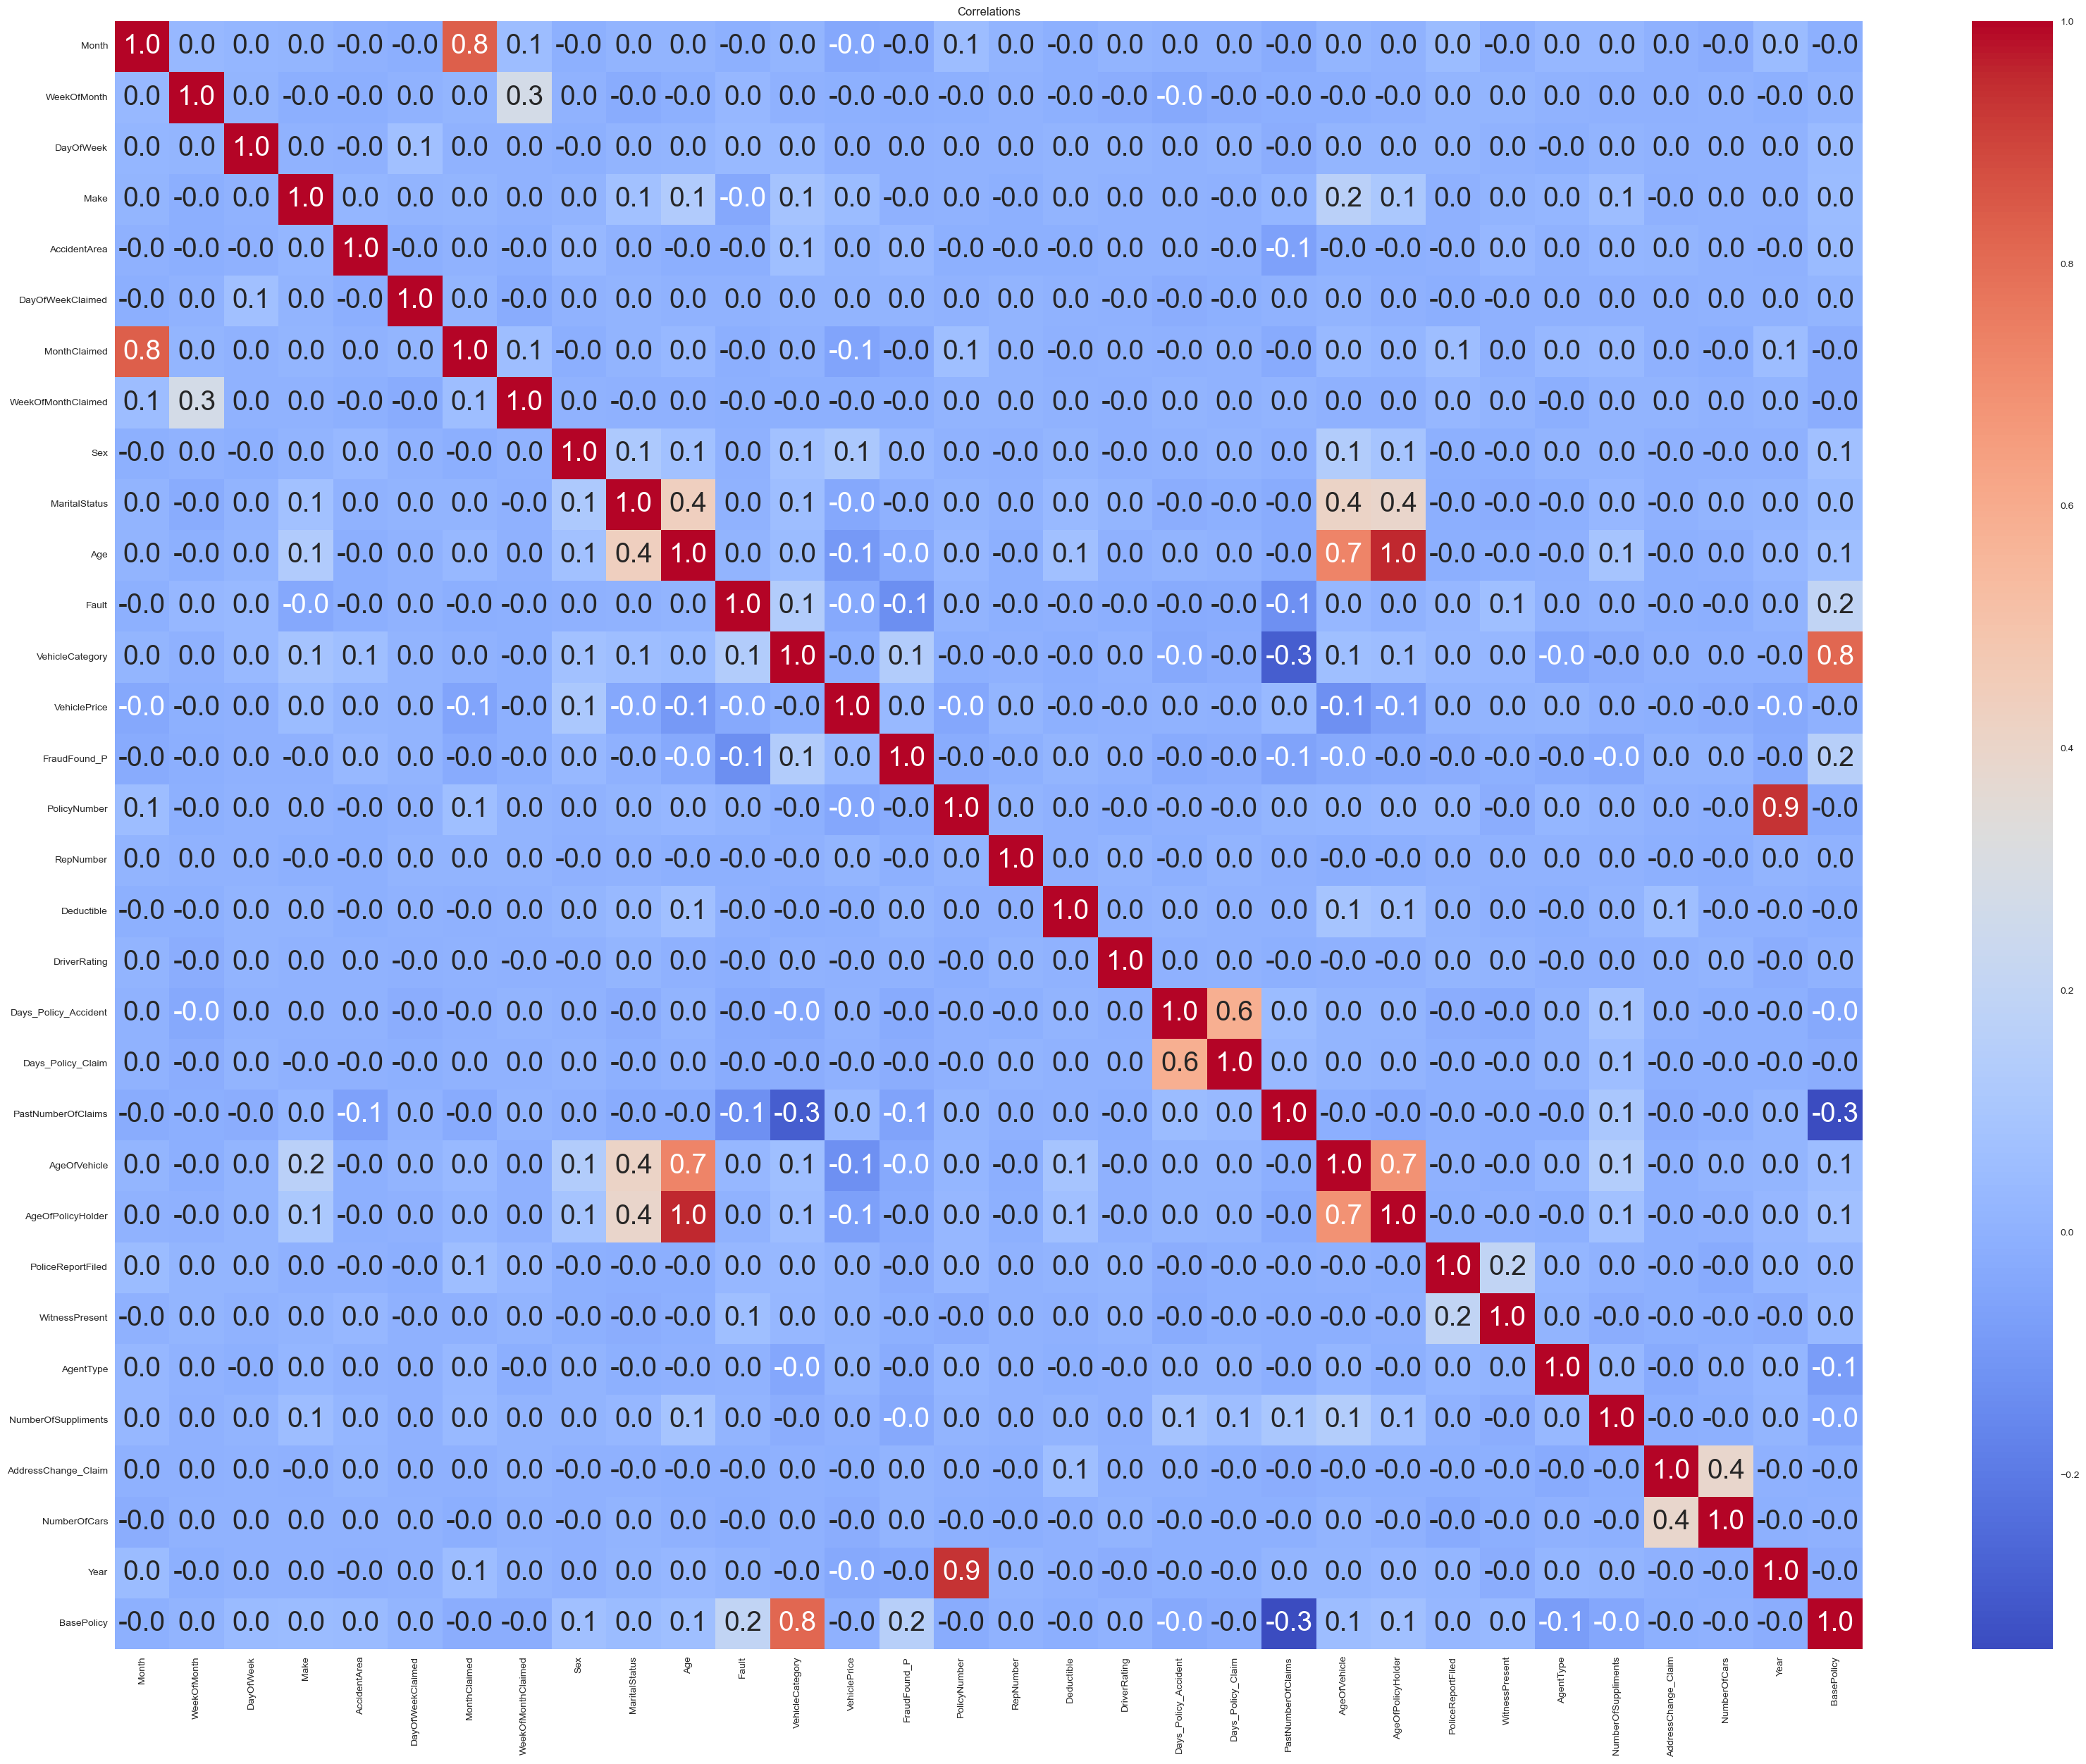

In [61]:
plt.figure(figsize=(40, 30))
sns.heatmap(claims_data.corr(), annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlations')
plt.show()

PLOTTING ONLY THE FEATURES WITH STRONG CORRELATIONS 

Index(['Month', 'MonthClaimed', 'Age', 'VehicleCategory', 'PolicyNumber',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'Year', 'BasePolicy'],
      dtype='object')


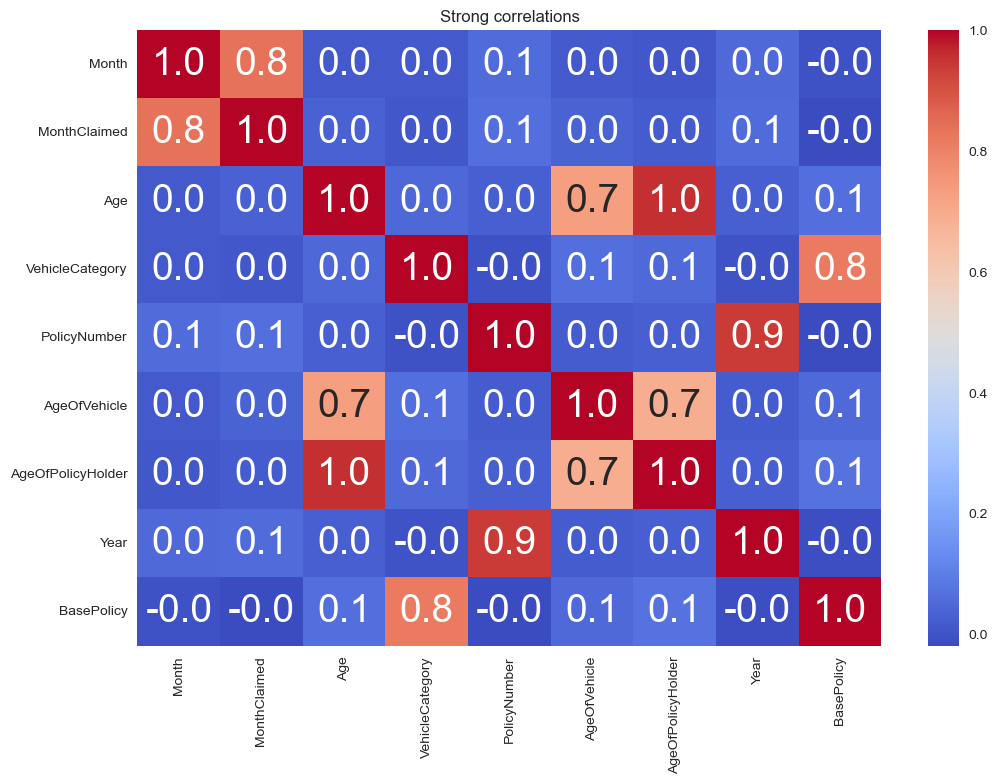

In [62]:
# Only strong correlations
corr_matrix = claims_data.corr()
threshold = 0.7

# Create a mask for values above the threshold or below the negative threshold, excluding self-correlation
mask = np.abs(corr_matrix) >= threshold
np.fill_diagonal(mask.values, False)

# Filter the columns and rows based on the mask
filtered_columns = corr_matrix.columns[mask.any()]
filtered_corr = corr_matrix.loc[filtered_columns, filtered_columns]
print(filtered_columns)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Strong correlations')
plt.show()


SPLITTING THE DATA

The data was split into train and test sets for model implementation

In [63]:
from sklearn.model_selection import train_test_split
 
# Assuming 'claims_data' is your DataFrame and 'FraudFound_P' is the target variable
X = claims_data.drop('FraudFound_P', axis=1)  # Features (all columns except 'class')
y = claims_data['FraudFound_P']  # Target variable


In [64]:
X

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0         12            5          3     0             0                 2   
1          1            3          3     0             0                 1   
2         10            5          5     0             0                 4   
3          6            2          6     1             1                 5   
4          1            5          1     0             0                 2   
...      ...          ...        ...   ...           ...               ...   
15415     11            4          5     1             0                 2   
15416     11            5          4     5             0                 5   
15417     11            5          4     1             1                 5   
15418     12            1          1     1             0                 4   
15419     12            2          3     1             0                 4   

       MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  \
0                 1                   1    0              1  ...   
1                 1                   4    1              1  ...   
2                11                   2    1              2  ...   
3                 7                   1    1              2  ...   
4                 2                   2    0              1  ...   
...             ...                 ...  ...            ...  ...   
15415            11                   5    1              2  ...   
15416            12                   1    1              2  ...   
15417            12                   1    1              1  ...   
15418            12                   2    0              2  ...   
15419            12                   3    1              1  ...   

       AgeOfVehicle  AgeOfPolicyHolder  PoliceReportFiled  WitnessPresent  \
0                 3               28.0                  0               0   
1                 6               33.0                  1               0   
2                 7               45.5                  0               0   
3                10               58.0                  1               0   
4                 5               33.0                  0               0   
...             ...                ...                ...             ...   
15415             6               33.0                  0               0   
15416             6               33.0                  0               0   
15417             5               28.0                  0               0   
15418             2               33.0                  0               0   
15419             5               28.0                  0               0   

       AgentType  NumberOfSuppliments  AddressChange_Claim  NumberOfCars  \
0              0                  0.0                  1.0           3.5   
1              0                  0.0                  0.0           1.0   
2              0                  0.0                  0.0           1.0   
3              0                  6.0                  0.0           1.0   
4              0                  0.0                  0.0           1.0   
...          ...                  ...                  ...           ...   
15415          0                  0.0                  0.0           1.0   
15416          0                  6.0                  0.0           3.5   
15417          0                  1.5                  0.0           1.0   
15418          0                  6.0                  0.0           1.0   
15419          0                  1.5                  0.0           1.0   

       Year  BasePolicy  
0      1994           0  
1      1994           1  
2      1994           1  
3      1994           0  
4      1994           1  
...     ...         ...  
15415  1996           1  
15416  1996           0  
15417  1996           1  
15418  1996           2  
15419  1996           1  

[15420 rows x 31 columns]

In [65]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15420, dtype: int64

FEATURE SELECTION USING ANOVA F-SCORES

In [66]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X and y are your feature and target variables
# Select top 10 features using ANOVA F-value test
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_features_indices]

print("Selected Features:", selected_feature_names)


Selected Features: Index(['Month', 'AccidentArea', 'MonthClaimed', 'Sex', 'Age', 'Fault',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'Year', 'BasePolicy'],
      dtype='object')


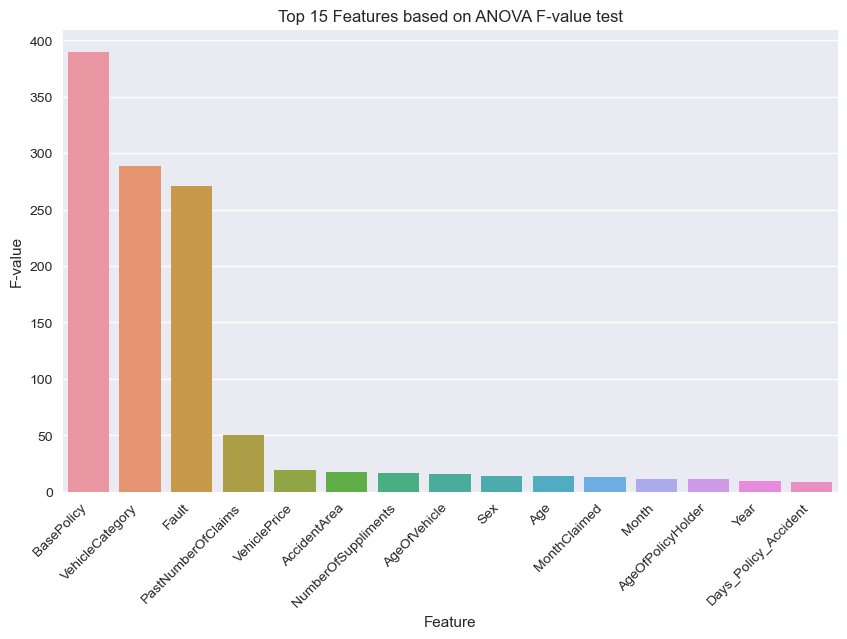

In [67]:
from sklearn.feature_selection import f_classif
 
# Assuming X and y are your feature and target variables
 
# Perform ANOVA F-value test
f_values, p_values = f_classif(X, y)
 
# Create a DataFrame with the original feature names and corresponding F-values
f_df = pd.DataFrame({'feature': X.columns, 'F-value': f_values})
 
# Sort the DataFrame by F-value in descending order and select the top 10 features
top_features = f_df.sort_values(by='F-value', ascending=False).head(15)
 
# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='feature', y='F-value', data=top_features)
plt.title('Top 15 Features based on ANOVA F-value test')
plt.xlabel('Feature')
plt.ylabel('F-value')
plt.xticks(rotation=45, ha='right')
plt.show()

EXTRACTING THE SELECTED FEATURES, SPLITTING AND SCALING THE DATA FOR MODEL IMPLEMENTATION

In [68]:
X = X_new
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
 
# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
 
# Transform the test data using the same scaler
X_test= scaler.transform(X_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (12336, 15)
Shape of X_test: (3084, 15)
Shape of y_train: (12336,)
Shape of y_test: (3084,)


MODEL IMPLEMENTATION USING IMBALANCED DATA AND FEATURE SELECTION (15 FEATURES)

In [70]:
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

In [71]:
pip install tabulate

MODEL PERFORMANCE FOR NORMAL IMBALANCED DATA WITH 15 FEATURES SELECTED

In [72]:
from tabulate import tabulate
from sklearn.metrics import f1_score

# Train and evaluate Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
 
# Train and evaluate Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
 
# Train and evaluate Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
 
# Train and evaluate Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
 
# Train and evaluate Gradient Boosting Classifier model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
 
# Train and evaluate Support Vector Machine model
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
 
# Calculate precision, recall, and F1 score for each model
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
 
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
 
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
 
gnb_precision = precision_score(y_test, gnb_predictions)
gnb_recall = recall_score(y_test, gnb_predictions)
gnb_f1 = f1_score(y_test, gnb_predictions)
 
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)
 
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
 
# Calculate precision, recall, and F1 score for each model
 
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
gnb_precision = precision_score(y_test, gnb_predictions)
gnb_recall = recall_score(y_test, gnb_predictions)
gnb_f1 = f1_score(y_test, gnb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
 
# Create a dictionary with the desired metrics
results = {
 
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian NB', 'Gradient Boosting Classifier', 'Support Vector Machine'],
    'Test Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy, gnb_accuracy, gb_accuracy, svm_accuracy],
    'Precision': [lr_precision, dt_precision, rf_precision, gnb_precision, gb_precision, svm_precision],
    'Recall': [lr_recall, dt_recall, rf_recall, gnb_recall, gb_recall, svm_recall],
    'F1 Score': [lr_f1, dt_f1, rf_f1, gnb_f1, gb_f1, svm_f1]
 
}
# Convert the dictionary to a DataFrame
df_results = pd.DataFrame(results)
# Display the DataFrame
print(tabulate(df_results, headers='keys', tablefmt='psql'))

+----+------------------------------+-----------------+-------------+------------+------------+
|    | Model                        |   Test Accuracy |   Precision |     Recall |   F1 Score |
|----+------------------------------+-----------------+-------------+------------+------------|
|  0 | Logistic Regression          |        0.936122 |    0        | 0          |  0         |
|  1 | Decision Tree                |        0.893969 |    0.196262 | 0.213198   |  0.20438   |
|  2 | Random Forest                |        0.935149 |    0.363636 | 0.0203046  |  0.0384615 |
|  3 | Gaussian NB                  |        0.904345 |    0.20122  | 0.167513   |  0.182825  |
|  4 | Gradient Boosting Classifier |        0.936446 |    1        | 0.00507614 |  0.010101  |
|  5 | Support Vector Machine       |        0.936122 |    0        | 0          |  0         |
+----+------------------------------+-----------------+-------------+------------+------------+


PLOTTING THE CONFUSION MATRIX FOR IMPLEMENTED MODELS

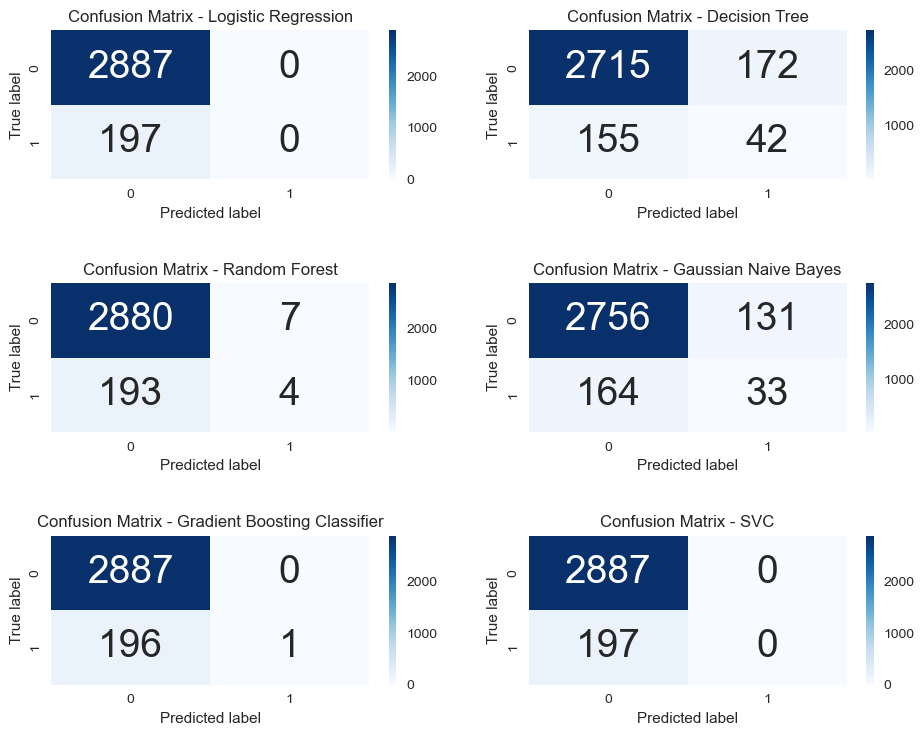

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
 
# Assuming 'models' and 'model_names' are already defined and initialized with the respective models and names
# Also assuming X_test and y_test are defined
 
models = [lr, dt, rf, gnb, gb, svm]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'Gradient Boosting Classifier', 'SVC']
 
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
 
# Loop through models and plot confusion matrix for each
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(3, 2, i+1)  # Arrange plots in 3 rows 2 columns
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f"Confusion Matrix - {model_names[i]}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
 
plt.tight_layout()
plt.show()

GENERATING THE CLASSIFICATION REPORT FOR IMPLEMENTED ALGORITHMS

In [74]:
#Genrating the classification report for each algorithm used
# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gaussian Naive Bayes': gnb,
    'GradientBoostingClassifier': gb,
    'SVC':svm
}

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.00      0.00      0.00       197

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2887
           1       0.20      0.21      0.20       197

    accuracy                           0.89      3084
   macro avg       0.57      0.58      0.57      3084
weighted avg       0.90      0.89      0.90      3084

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.36      0.02      0.04       197

    accuracy                           0.94      3084
  

PLOTTING THE ROC CURVE

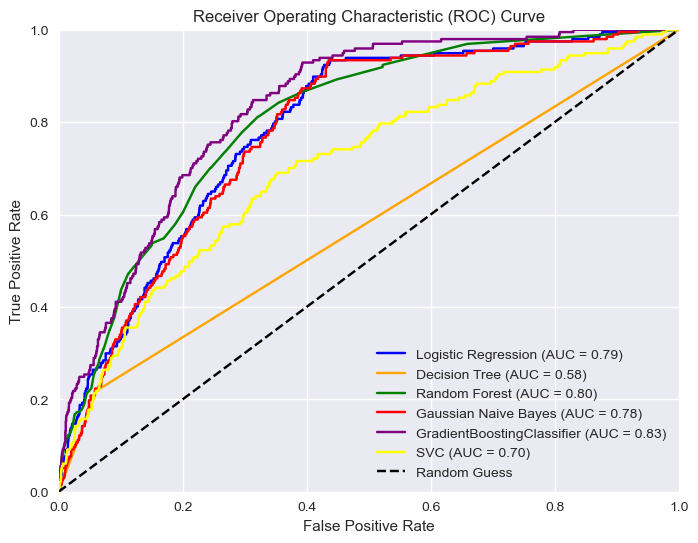

In [75]:
# Initialize models
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gnb = GaussianNB()
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(probability=True)  # Set probability=True for SVC

#Plotting the roc curve for model comparison
model_list = [lr, dt, rf, gnb,gb,svm]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes','GradientBoostingClassifier','SVC']
colors = ['blue', 'orange', 'green', 'red','purple','yellow']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

PERFORMING RANDOM UNDERSAMPLING ON TARGET VARIABLE TO ADDRESS THE ISSUE OF IMBALANCED DATA

To address the class imbalance issue, random undersampling technique was used to help improve the prformance of the minority class as well as reduce a bias prediction of the models.

In [76]:
#Performing Random Under sampling technique to balance the target variable
from sklearn.utils import resample

y = claims_data['FraudFound_P'] # target variable
target = y

# Separate majority and minority classes
majority_class = claims_data[y == 0]
minority_class = claims_data[y == 1]

# Undersample majority class
undersampled_majority = resample(majority_class,
                                 replace=False, # sampling without replacement
                                 n_samples=len(minority_class), # set the number of samples to match the minority class
                                 random_state=42) # for reproducibility

# Combine minority class and undersampled majority class
undersampled_claims = pd.concat([minority_class, undersampled_majority])

# Shuffle the data
undersampled_claims = undersampled_claims.sample(frac=1, random_state=42)
print("Shape of undersampled_claims:", undersampled_claims.shape)

Shape of undersampled_claims: (1846, 32)


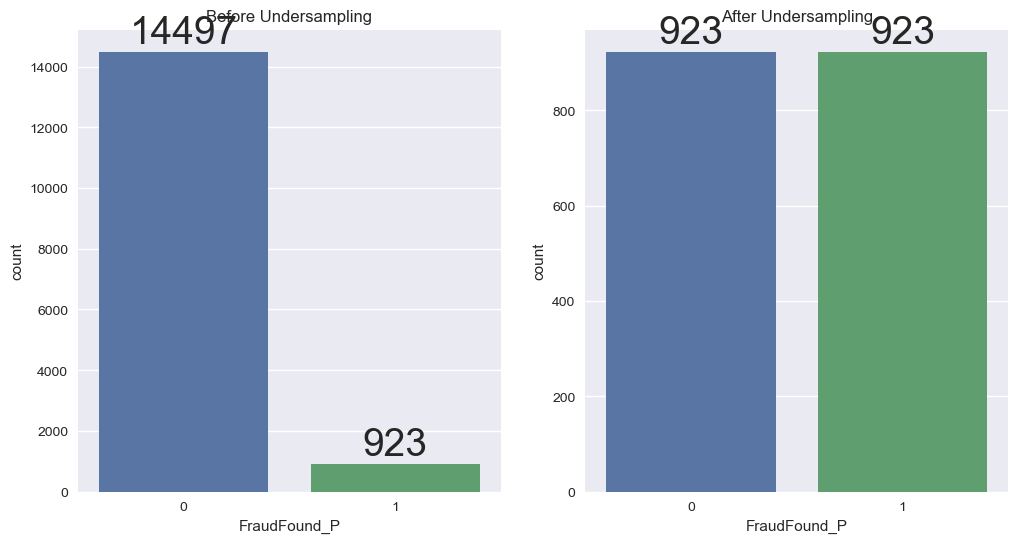

In [77]:
# Plot distribution of target variable before and after undersampling
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
sns.countplot(data=claims_data, x='FraudFound_P', ax=axs[0])
axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Before Undersampling')
sns.countplot(data=undersampled_claims, x='FraudFound_P', ax=axs[1])
axs[1].bar_label(axs[1].containers[0])
axs[1].set_title('After Undersampling')
plt.show()

SPLITTING THE UNDERSAMPLED DATA

In [78]:
X_under = undersampled_claims.drop(columns=['FraudFound_P'])  # Features
y_under = undersampled_claims['FraudFound_P']  # Target variable

FEATURE SELECTION AFTER UNDERSAMPLING

In [79]:
# Select top 15 features using ANOVA F-value test
selector = SelectKBest(score_func=f_classif, k=15)
X_under_new = selector.fit_transform(X_under, y_under)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features from the original set of features
selected_feature_names = X_under.columns[selected_features_indices]

print("Selected Features:", selected_feature_names)

Selected Features: Index(['Month', 'WeekOfMonth', 'AccidentArea', 'MonthClaimed', 'Sex', 'Age',
       'Fault', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'AgentType',
       'BasePolicy'],
      dtype='object')


In [80]:
X_under = X_under_new

# Split the data into training and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

SCALING THE UNDERSAMPLED DATA

In [81]:
# Initialize the StandardScaler
scaler = StandardScaler()
 
# Fit the scaler on the training data and transform it
X_train_under = scaler.fit_transform(X_train_under)
 
# Transform the test data using the same scaler
X_test_under= scaler.transform(X_test_under)

print("Shape of X_train_under:", X_train_under.shape)
print("Shape of X_test_under:", X_test_under.shape)
print("Shape of y_train_under:", y_train_under.shape)
print("Shape of y_test_under:", y_test_under.shape)

Shape of X_train_under: (1476, 15)
Shape of X_test_under: (370, 15)
Shape of y_train_under: (1476,)
Shape of y_test_under: (370,)


PERFORMING K-FOLD CROSS-VALIDATION AFTER UNDERSAMPLING TO TRAINING DATA

In [82]:
#Performing K-fold cross validation for all four models
# Create a list of models
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=42),
    SVC(probability=True)  # Set probability=True for SVC
]

# Perform k-fold cross-validation with k=5 for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    cv_results = cross_val_score(model, X_train_under, y_train_under, cv=kf)
    print(f"Accuracy for {model.__class__.__name__}: {cv_results}")
    print(f"Average accuracy for {model.__class__.__name__}: {cv_results.mean()}\n")

Accuracy for DecisionTreeClassifier: [0.65878378 0.65762712 0.67457627 0.62372881 0.62372881]
Average accuracy for DecisionTreeClassifier: 0.6476889601465873

Accuracy for RandomForestClassifier: [0.72635135 0.74576271 0.75254237 0.76949153 0.71525424]
Average accuracy for RandomForestClassifier: 0.7418804397617957

Accuracy for GradientBoostingClassifier: [0.73310811 0.76949153 0.76610169 0.76610169 0.69830508]
Average accuracy for GradientBoostingClassifier: 0.7466216216216216

Accuracy for GaussianNB: [0.75       0.7559322  0.74576271 0.75254237 0.71525424]
Average accuracy for GaussianNB: 0.7438983050847459

Accuracy for LogisticRegression: [0.73986486 0.75932203 0.74237288 0.76949153 0.71525424]
Average accuracy for LogisticRegression: 0.7452611085661933

Accuracy for SVC: [0.75675676 0.75932203 0.77966102 0.78305085 0.71864407]
Average accuracy for SVC: 0.7594869445716903



MODEL IMPLEMENTATION USING HYPERPARAMETERS AND GRIDSEARCH WITH CROSS VALIDATION ON UNDERSAMPLED DATA (15 SELECTED FESATURES)

In [83]:
# Initialize models
lr_under = LogisticRegression(random_state=42)
dt_under = DecisionTreeClassifier(random_state=42)
rf_under = RandomForestClassifier(random_state=42)
gnb_under = GaussianNB()
gb_under = GradientBoostingClassifier(random_state=42)
svm_under = SVC(probability=True)  # Set probability=True for SVC

# Define parameter grids for each model
dt_under_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_under_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_under_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_under_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

gb_under_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

svm_under_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Define a dictionary to map models to their respective parameter grids
param_grids = {
    'DecisionTreeClassifier_under': (DecisionTreeClassifier(random_state=42), dt_under_param_grid),
    'LogisticRegression_under': (LogisticRegression(random_state=42), lr_under_param_grid),
    'RandomForestClassifier_under': (RandomForestClassifier(random_state=42), rf_under_param_grid),
    'GaussianNB_under': (GaussianNB(), gnb_under_param_grid),
    'GradientBoostingClassifier_under': (GradientBoostingClassifier(random_state=42), gb_under_param_grid),
    'SVC_under': (SVC(probability=True), svm_under_param_grid)
}

# Initialize lists to store results
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform GridSearchCV for each model
for model_name, (model, param_grid) in param_grids.items():
    print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_under, y_train_under)
    
    print("Best parameters found:")
    print(grid_search.best_params_)
    
    # Use the best estimator to make predictions
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test_under)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_under, predictions)
    precision = precision_score(y_test_under, predictions)
    recall = recall_score(y_test_under, predictions)
    f1 = f1_score(y_test_under, predictions)
    
    # Store results
    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a dictionary with the desired metrics
results = {
    'Model': model_names,
    'Test Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
}

# Convert the dictionary to a DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
print(tabulate(df_results, headers='keys', tablefmt='psql'))

Performing GridSearchCV for DecisionTreeClassifier_under...
Best parameters found:
{'max_depth': 3, 'min_samples_split': 6}
Performing GridSearchCV for LogisticRegression_under...
Best parameters found:
{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Performing GridSearchCV for RandomForestClassifier_under...
Best parameters found:
{'max_depth': 9, 'min_samples_split': 6, 'n_estimators': 100}
Performing GridSearchCV for GaussianNB_under...
Best parameters found:
{'var_smoothing': 1e-09}
Performing GridSearchCV for GradientBoostingClassifier_under...
Best parameters found:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
Performing GridSearchCV for SVC_under...
Best parameters found:
{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
+----+----------------------------------+-----------------+-------------+----------+------------+
|    | Model                            |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+--------

PLOTTING THE CONFUSION MATRIX FOR THE MODELS IMPLEMENTED AFTER UNDERSAMPLING AND HYPERPARARMETER TUNING

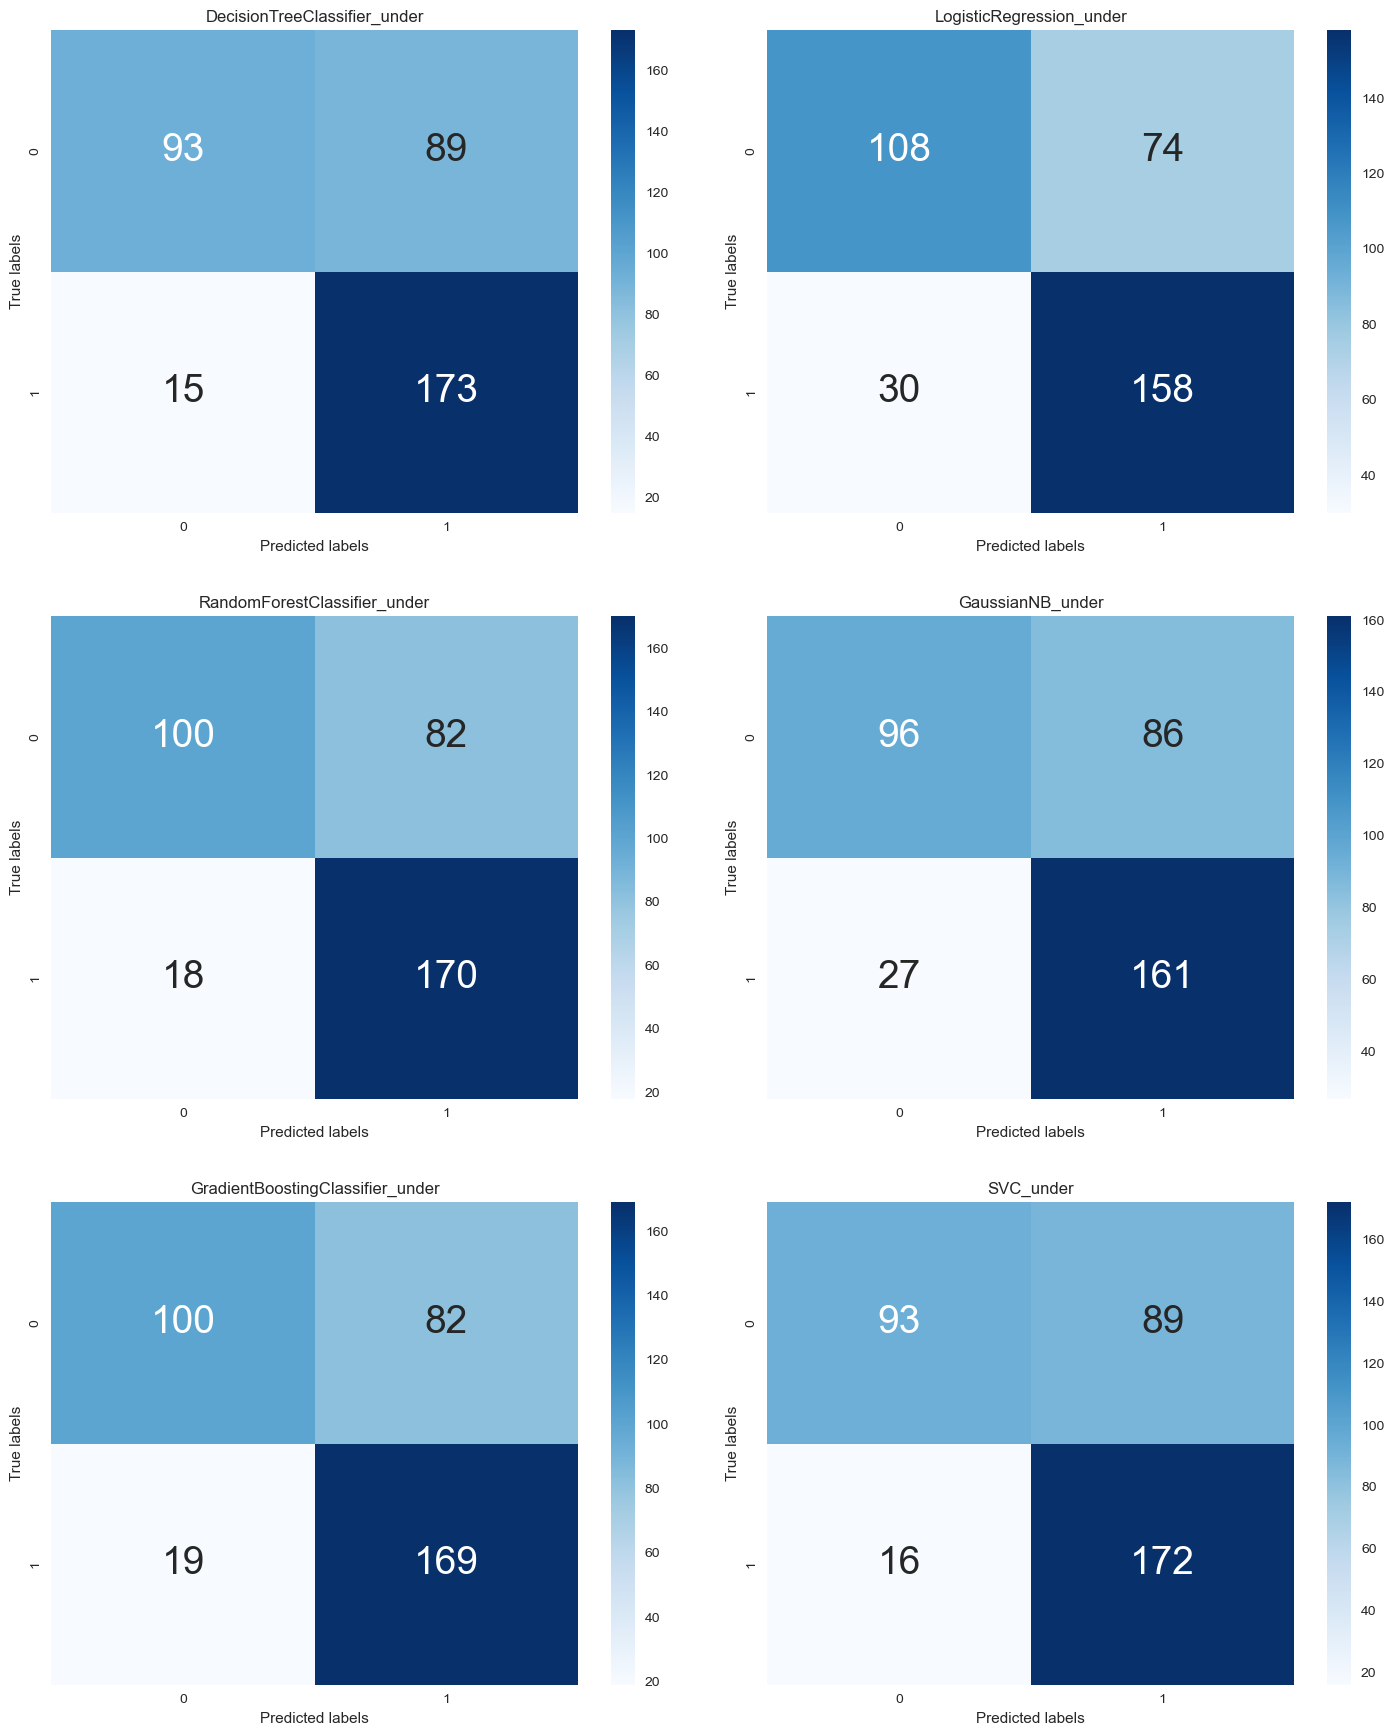

In [84]:
# Initialize models
lr_under = LogisticRegression(random_state=42)
dt_under = DecisionTreeClassifier(random_state=42)
rf_under = RandomForestClassifier(random_state=42)
gnb_under = GaussianNB()
gb_under = GradientBoostingClassifier(random_state=42)
svm_under = SVC(probability=True)  # Set probability=True for SVC

# Define parameter grids for each model
dt_under_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_under_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_under_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_under_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

gb_under_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

svm_under_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Define a dictionary to map models to their respective parameter grids
param_grids = {
    'DecisionTreeClassifier_under': (DecisionTreeClassifier(random_state=42), dt_under_param_grid),
    'LogisticRegression_under': (LogisticRegression(random_state=42), lr_under_param_grid),
    'RandomForestClassifier_under': (RandomForestClassifier(random_state=42), rf_under_param_grid),
    'GaussianNB_under': (GaussianNB(), gnb_under_param_grid),
    'GradientBoostingClassifier_under': (GradientBoostingClassifier(random_state=42), gb_under_param_grid),
    'SVC_under': (SVC(probability=True), svm_under_param_grid)
}
# Perform GridSearchCV for each model
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))

for i, (model_name, (model, param_grid)) in enumerate(param_grids.items()):
    #print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_under, y_train_under)
    
    
    # Use the best estimator to make predictions
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test_under)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_under, predictions)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(model_name)
    axes[i//2, i%2].set_xlabel('Predicted labels')
    axes[i//2, i%2].set_ylabel('True labels')

plt.tight_layout()
plt.show()


GENERATING THE CLASSIFICATION REPORT FOR IMPLEMENTED MODELS AFTER UNDERSAMPLING AND HYPERPARAMETER TUNING

In [85]:
# Initialize models
lr_under = LogisticRegression(random_state=42)
dt_under = DecisionTreeClassifier(random_state=42)
rf_under = RandomForestClassifier(random_state=42)
gnb_under = GaussianNB()
gb_under = GradientBoostingClassifier(random_state=42)
svm_under = SVC(probability=True)  # Set probability=True for SVC

# Define parameter grids for each model
dt_under_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_under_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_under_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_under_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

gb_under_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

svm_under_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Define a dictionary to map models to their respective parameter grids
param_grids = {
    'DecisionTreeClassifier_under': (DecisionTreeClassifier(random_state=42), dt_under_param_grid),
    'LogisticRegression_under': (LogisticRegression(random_state=42), lr_under_param_grid),
    'RandomForestClassifier_under': (RandomForestClassifier(random_state=42), rf_under_param_grid),
    'GaussianNB_under': (GaussianNB(), gnb_under_param_grid),
    'GradientBoostingClassifier_under': (GradientBoostingClassifier(random_state=42), gb_under_param_grid),
    'SVC_under': (SVC(probability=True), svm_under_param_grid)
}

for i, (model_name, (model, param_grid)) in enumerate(param_grids.items()):
    #print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_under, y_train_under)
    
    
    # Use the best estimator to make predictions
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test_under)

 # Generate classification report
    report = classification_report(y_test_under, predictions)
    print(f"Classification Report for {model_name}:\n{report}")
    

Classification Report for DecisionTreeClassifier_under:
              precision    recall  f1-score   support

           0       0.86      0.51      0.64       182
           1       0.66      0.92      0.77       188

    accuracy                           0.72       370
   macro avg       0.76      0.72      0.71       370
weighted avg       0.76      0.72      0.71       370

Classification Report for LogisticRegression_under:
              precision    recall  f1-score   support

           0       0.78      0.59      0.68       182
           1       0.68      0.84      0.75       188

    accuracy                           0.72       370
   macro avg       0.73      0.72      0.71       370
weighted avg       0.73      0.72      0.71       370

Classification Report for RandomForestClassifier_under:
              precision    recall  f1-score   support

           0       0.85      0.55      0.67       182
           1       0.67      0.90      0.77       188

    accuracy      

PLOTTING THE ROC CURVE AFTER UNDERSAMPLING AND HYPERPARAMETER TUNING

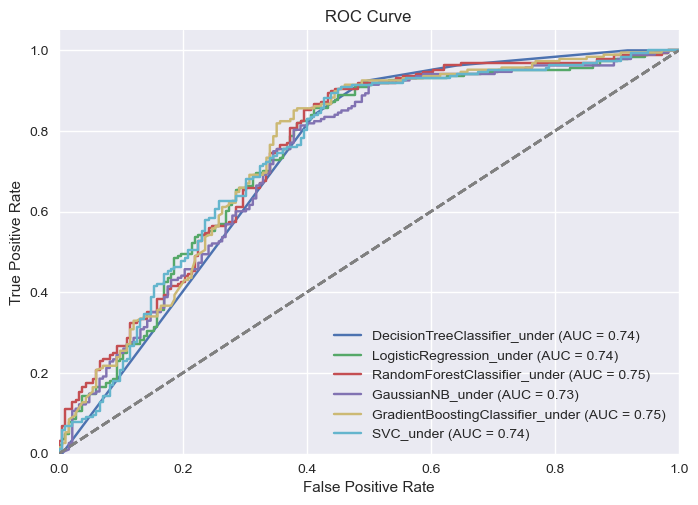

In [86]:
from sklearn.metrics import auc, roc_curve
# Initialize models
lr_under = LogisticRegression(random_state=42)
dt_under = DecisionTreeClassifier(random_state=42)
rf_under = RandomForestClassifier(random_state=42)
gnb_under = GaussianNB()
gb_under = GradientBoostingClassifier(random_state=42)
svm_under = SVC(probability=True)  # Set probability=True for SVC

# Define parameter grids for each model
dt_under_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_under_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_under_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_under_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

gb_under_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

svm_under_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Define a dictionary to map models to their respective parameter grids
param_grids = {
    'DecisionTreeClassifier_under': (DecisionTreeClassifier(random_state=42), dt_under_param_grid),
    'LogisticRegression_under': (LogisticRegression(random_state=42), lr_under_param_grid),
    'RandomForestClassifier_under': (RandomForestClassifier(random_state=42), rf_under_param_grid),
    'GaussianNB_under': (GaussianNB(), gnb_under_param_grid),
    'GradientBoostingClassifier_under': (GradientBoostingClassifier(random_state=42), gb_under_param_grid),
    'SVC_under': (SVC(probability=True), svm_under_param_grid)
}

for i, (model_name, (model, param_grid)) in enumerate(param_grids.items()):
    #print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_under, y_train_under)
    
    
    # Use the best estimator to make predictions
    best_model = grid_search.best_estimator_
    
   # Check if the model can predict probabilities. If not, use decision function
    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(X_test_under)[:, 1]
    else:
        y_prob = best_model.decision_function(X_test_under)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # scale 0 to 1
 
    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test_under, y_prob)
    roc_auc = auc(fpr, tpr)
 
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    # Plot the random classifier line
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.legend(title='Model (AUC)', loc="lower right")
    #plt.legend(loc="lower right")
 
# Add legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
# Show the plot
plt.show()

PERFORMING RANDOM OVERSAMPLING ON TARGET VARIABLE TO ADDRESS THE ISSUE OF IMBALANCED DATA

In [87]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = claims_data[y == 0]
minority_class = claims_data[y == 1]

# Upsample minority class
oversampled_minority = resample(minority_class,
                                replace=True,  # Sample with replacement
                                n_samples=len(majority_class),  # Set the number of samples to match the majority class
                                random_state=42)  # For reproducibility

# Combine majority class and oversampled minority class
oversampled_claims = pd.concat([majority_class, oversampled_minority])

# Shuffle the data
oversampled_claims = oversampled_claims.sample(frac=1, random_state=42)
print("Shape of oversampled_claims:", oversampled_claims.shape)

Shape of oversampled_claims: (28994, 32)


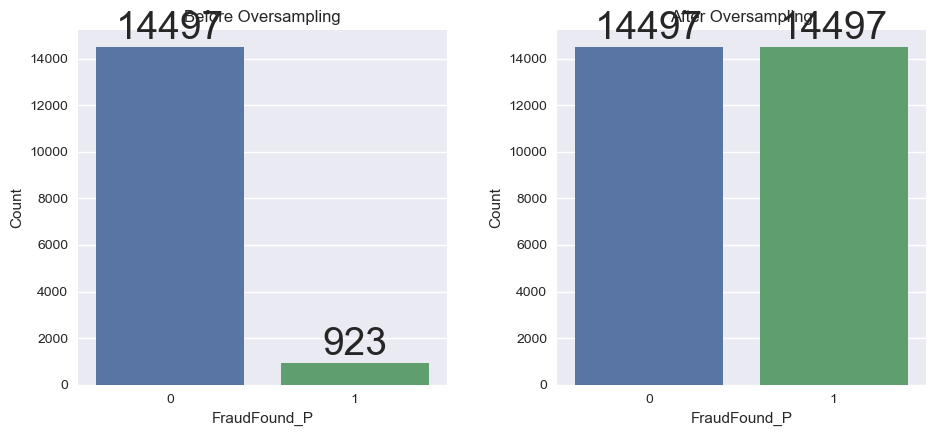

In [88]:
# Plot distribution before oversampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='FraudFound_P', data=claims_data)
plt.title('Before Oversampling')
plt.xlabel('FraudFound_P')
plt.ylabel('Count')

# Add count numbers on top of the bars for the first plot
for container in plt.gca().containers:
    plt.gca().bar_label(container)

# Plot distribution after oversampling
plt.subplot(1, 2, 2)
sns.countplot(x='FraudFound_P', data=oversampled_claims)
plt.title('After Oversampling')
plt.xlabel('FraudFound_P')
plt.ylabel('Count')

# Add count numbers on top of the bars for the second plot
for container in plt.gca().containers:
    plt.gca().bar_label(container)

plt.tight_layout()
plt.show()


SPLITTING THE OVERSAMPLED DATA

In [89]:
# Separate features and target variable
X_over = oversampled_claims.drop(columns=['FraudFound_P'])  # Features
y_over = oversampled_claims['FraudFound_P']  # Target variable

FEATURE SELECTION AFTER OVERSAMPLING

In [90]:
# Select top 15 features using ANOVA F-value test
selector = SelectKBest(score_func=f_classif, k=15)
X_over_new = selector.fit_transform(X_over, y_over)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features from the original set of features
selected_feature_names = X_over.columns[selected_features_indices]

print("Selected Features:", selected_feature_names)

Selected Features: Index(['Month', 'AccidentArea', 'MonthClaimed', 'Sex', 'Age', 'Fault',
       'VehicleCategory', 'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'AgentType', 'NumberOfSuppliments', 'Year',
       'BasePolicy'],
      dtype='object')


In [91]:
X_over = X_over_new

# Split the data into training and test sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

SCALING THE OVERSAMPLED DATA

In [92]:
# Initialize the StandardScaler
scaler = StandardScaler()
 
# Fit the scaler on the training data and transform it
X_train_over = scaler.fit_transform(X_train_over)
 
# Transform the test data using the same scaler
X_test_over= scaler.transform(X_test_over)

print("Shape of X_train_over:", X_train_over.shape)
print("Shape of X_test_over:", X_test_over.shape)
print("Shape of y_train_over:", y_train_over.shape)
print("Shape of y_test_over:", y_test_over.shape)

Shape of X_train_over: (23195, 15)
Shape of X_test_over: (5799, 15)
Shape of y_train_over: (23195,)
Shape of y_test_over: (5799,)


PERFORMING K-FOLD CROSS-VALIDATION AFTER OVERSAMPLING TO TRAINING DATA

In [93]:
#Performing K-fold cross validation for all four models
# Create a list of models
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=42),
    SVC(probability=True)  # Set probability=True for SVC
]

# Perform k-fold cross-validation with k=5 for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    cv_results = cross_val_score(model, X_train_over, y_train_over, cv=kf)
    print(f"Accuracy for {model.__class__.__name__}: {cv_results}")
    print(f"Average accuracy for {model.__class__.__name__}: {cv_results.mean()}\n")

Accuracy for DecisionTreeClassifier: [0.96249192 0.96119853 0.96486312 0.95753395 0.95925846]
Average accuracy for DecisionTreeClassifier: 0.9610691959474025

Accuracy for RandomForestClassifier: [0.98297047 0.98491054 0.98728174 0.988144   0.98986851]
Average accuracy for RandomForestClassifier: 0.9866350506574693

Accuracy for GradientBoostingClassifier: [0.77990946 0.76762233 0.79284329 0.79413667 0.79780125]
Average accuracy for GradientBoostingClassifier: 0.7864625996982109

Accuracy for GaussianNB: [0.73765898 0.72752748 0.75167062 0.74563484 0.74757491]
Average accuracy for GaussianNB: 0.7420133649493426

Accuracy for LogisticRegression: [0.73701229 0.72558741 0.74757491 0.73959905 0.74283251]
Average accuracy for LogisticRegression: 0.7385212330243587

Accuracy for SVC: [0.80060358 0.79133434 0.81138176 0.80146583 0.81224402]
Average accuracy for SVC: 0.8034059064453546



MODEL IMPLEMENTATION USING HYPERPARAMETERS AND GRIDSEARCH WITH CROSS VALIDATION ON OVERSAMPLED DATA (15 SELECTED FEATURES)

In [94]:
# Initialize models
lr_over = LogisticRegression(random_state=42)
dt_over = DecisionTreeClassifier(random_state=42)
rf_over = RandomForestClassifier(random_state=42)
gnb_over = GaussianNB()
gb_over = GradientBoostingClassifier(random_state=42)
#svm_over = SVC(probability=True)  # Set probability=True for SVC

# Define parameter grids for each model
dt_over_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_over_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_over_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_over_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

gb_over_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

#svm_over_param_grid = {
  #  'C': [0.1, 1, 10],
   # 'kernel': ['linear', 'rbf', 'poly'],
    #'gamma': ['scale', 'auto']
#}

# Define a dictionary to map models to their respective parameter grids
param_grids = {
    'DecisionTreeClassifier_over': (DecisionTreeClassifier(random_state=42), dt_over_param_grid),
    'LogisticRegression_over': (LogisticRegression(random_state=42), lr_over_param_grid),
    'RandomForestClassifier_over': (RandomForestClassifier(random_state=42), rf_over_param_grid),
    'GaussianNB_over': (GaussianNB(), gnb_over_param_grid),
    'GradientBoostingClassifier_over': (GradientBoostingClassifier(random_state=42), gb_over_param_grid),
    #'SVC_over': (SVC(probability=True), svm_over_param_grid)
}

# Initialize lists to store results
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform GridSearchCV for each model
for model_name, (model, param_grid) in param_grids.items():
    print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_over, y_train_over)
    
    print("Best parameters found:")
    print(grid_search.best_params_)
    
    # Use the best estimator to make predictions
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test_over)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_over, predictions)
    precision = precision_score(y_test_over, predictions)
    recall = recall_score(y_test_over, predictions)
    f1 = f1_score(y_test_over, predictions)
    
    # Store results
    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a dictionary with the desired metrics
results = {
    'Model': model_names,
    'Test Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
}

# Convert the dictionary to a DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
print(tabulate(df_results, headers='keys', tablefmt='psql'))

Performing GridSearchCV for DecisionTreeClassifier_over...
Best parameters found:
{'max_depth': 9, 'min_samples_split': 2}
Performing GridSearchCV for LogisticRegression_over...
Best parameters found:
{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Performing GridSearchCV for RandomForestClassifier_over...
Best parameters found:
{'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 50}
Performing GridSearchCV for GaussianNB_over...
Best parameters found:
{'var_smoothing': 1e-09}
Performing GridSearchCV for GradientBoostingClassifier_over...
Best parameters found:
{'learning_rate': 0.5, 'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 200}
+----+---------------------------------+-----------------+-------------+----------+------------+
|    | Model                           |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+---------------------------------+-----------------+-------------+----------+------------|
|  0 | DecisionTreeClassifier_over   

PLOTTING THE CONFUSION MATRIX FOR THE MODELS IMPLEMENTED AFTER OVERSAMPLING AND HYPERPARAMETER TUNING

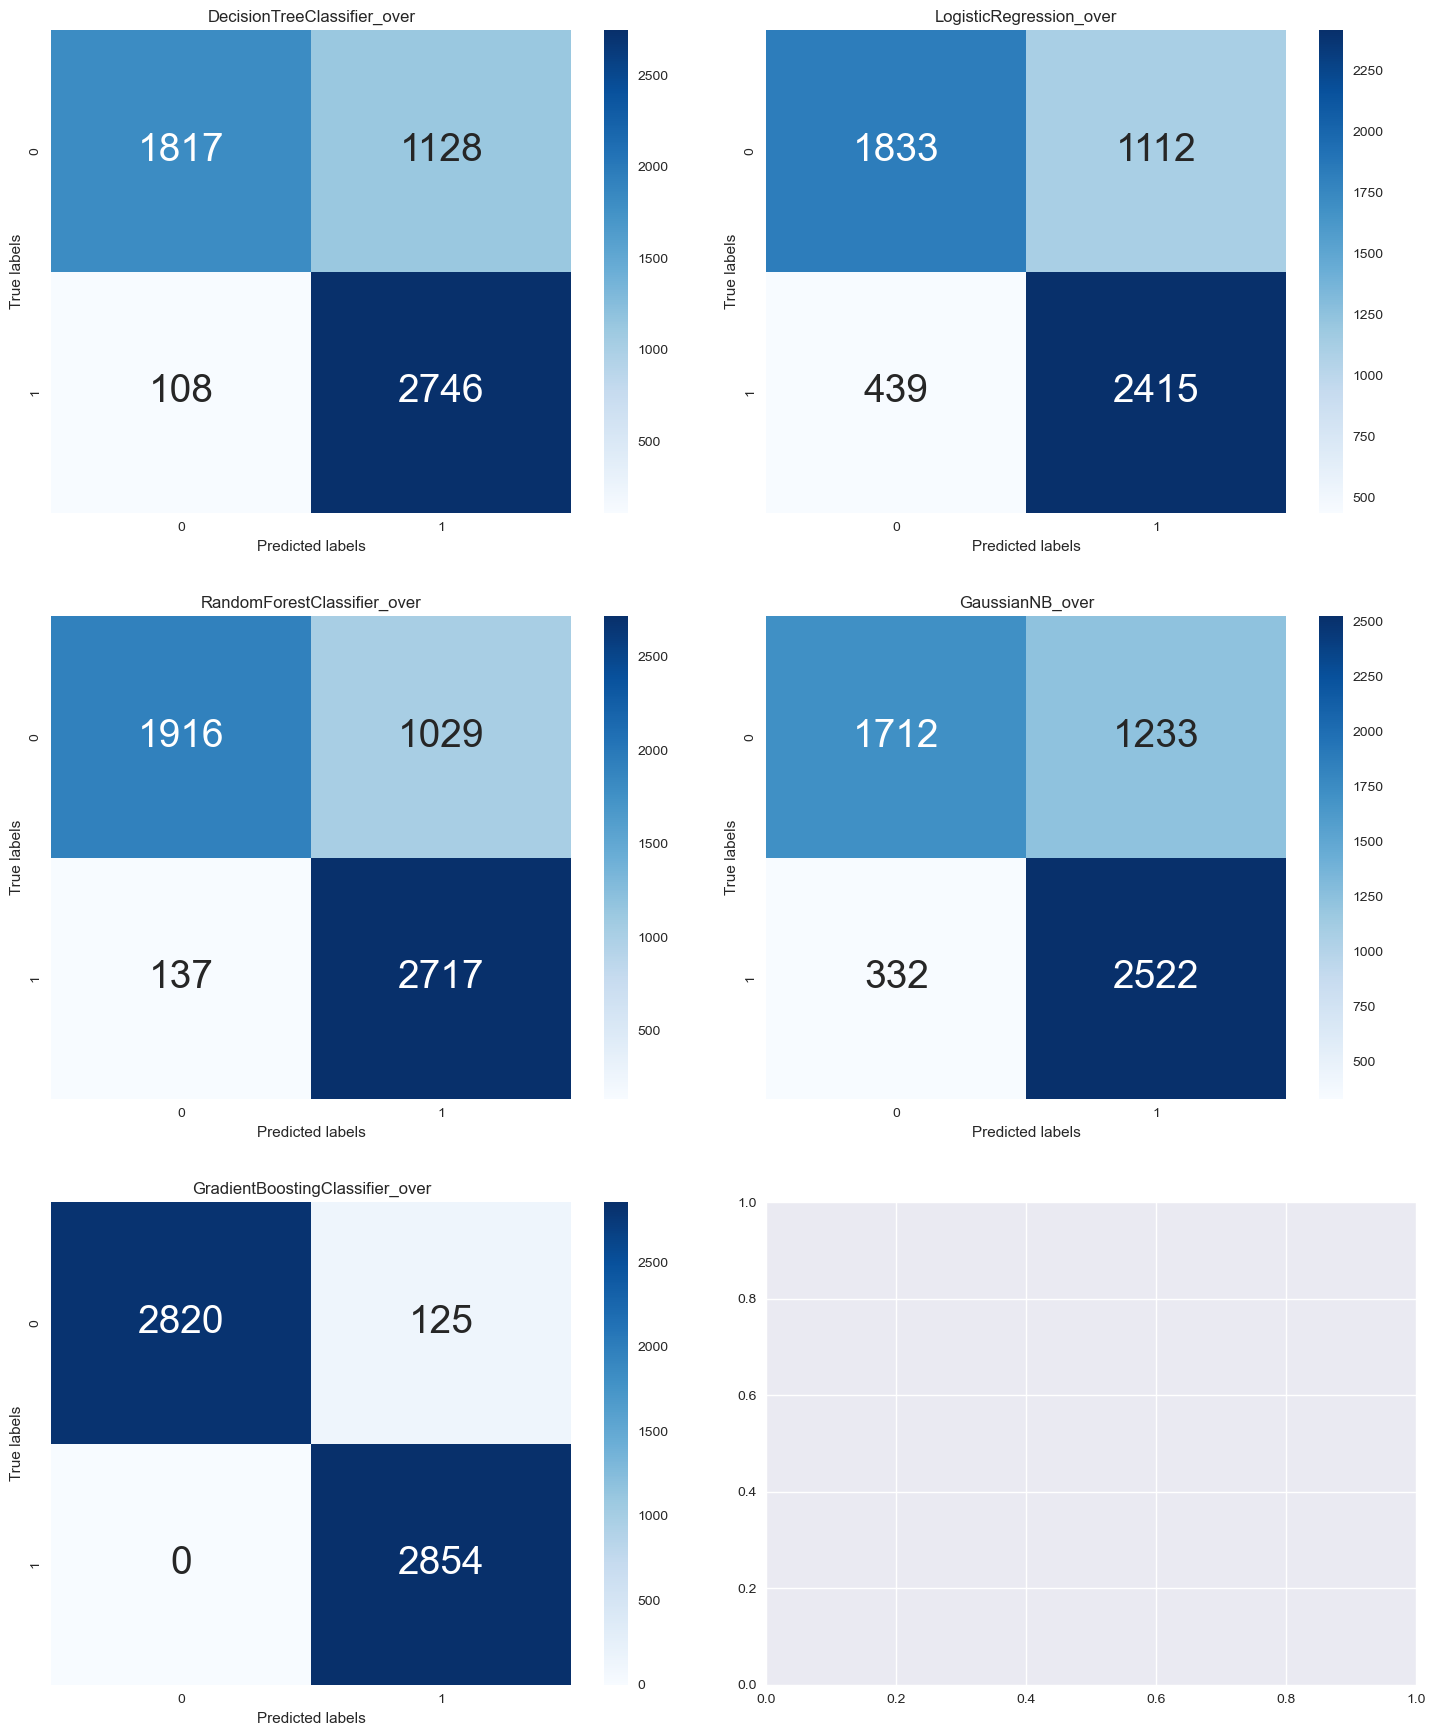

In [95]:
# Initialize models
lr_over = LogisticRegression(random_state=42)
dt_over = DecisionTreeClassifier(random_state=42)
rf_over = RandomForestClassifier(random_state=42)
gnb_over = GaussianNB()
gb_over = GradientBoostingClassifier(random_state=42)
#svm_over = SVC(probability=True)  # Set probability=True for SVC

# Define parameter grids for each model
dt_over_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_over_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_over_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_over_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

gb_over_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

#svm_over_param_grid = {
  # 'C': [0.1, 1, 10],
  # 'kernel': ['linear', 'rbf', 'poly'],
  # 'gamma': ['scale', 'auto']
#}

# Define a dictionary to map models to their respective parameter grids
param_grids = {
    'DecisionTreeClassifier_over': (DecisionTreeClassifier(random_state=42), dt_over_param_grid),
    'LogisticRegression_over': (LogisticRegression(random_state=42), lr_over_param_grid),
    'RandomForestClassifier_over': (RandomForestClassifier(random_state=42), rf_over_param_grid),
    'GaussianNB_over': (GaussianNB(), gnb_over_param_grid),
    'GradientBoostingClassifier_over': (GradientBoostingClassifier(random_state=42), gb_over_param_grid),
    #'SVC_over': (SVC(probability=True), svm_over_param_grid)
}

# Perform GridSearchCV for each model
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))

for i, (model_name, (model, param_grid)) in enumerate(param_grids.items()):
    #print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_over, y_train_over)
    
    
    # Use the best estimator to make predictions
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test_over)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_over, predictions)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(model_name)
    axes[i//2, i%2].set_xlabel('Predicted labels')
    axes[i//2, i%2].set_ylabel('True labels')

plt.tight_layout()
plt.show()


GENERATING THE CLASSIFICATION REPORT FOR IMPLEMENTED MODELS AFTER OVERSAMPLING AND HYPERPARAMETER TUNING

In [96]:
# Initialize models
lr_over = LogisticRegression(random_state=42)
dt_over = DecisionTreeClassifier(random_state=42)
rf_over = RandomForestClassifier(random_state=42)
gnb_over = GaussianNB()
gb_over = GradientBoostingClassifier(random_state=42)
#svm_over = SVC(probability=True)  # Set probability=True for SVC

# Define parameter grids for each model
dt_over_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_over_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_over_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_over_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

gb_over_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

#svm_over_param_grid = {
  # 'C': [0.1, 1, 10],
  # 'kernel': ['linear', 'rbf', 'poly'],
  # 'gamma': ['scale', 'auto']
#}

# Define a dictionary to map models to their respective parameter grids
param_grids = {
    'DecisionTreeClassifier_over': (DecisionTreeClassifier(random_state=42), dt_over_param_grid),
    'LogisticRegression_over': (LogisticRegression(random_state=42), lr_over_param_grid),
    'RandomForestClassifier_over': (RandomForestClassifier(random_state=42), rf_over_param_grid),
    'GaussianNB_over': (GaussianNB(), gnb_over_param_grid),
    'GradientBoostingClassifier_over': (GradientBoostingClassifier(random_state=42), gb_over_param_grid),
    #'SVC_over': (SVC(probability=True), svm_over_param_grid)
}

for i, (model_name, (model, param_grid)) in enumerate(param_grids.items()):
    #print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_over, y_train_over)
    
    
    # Use the best estimator to make predictions
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test_over)

 # Generate classification report
    report = classification_report(y_test_over, predictions)
    print(f"Classification Report for {model_name}:\n{report}")
    

Classification Report for DecisionTreeClassifier_over:
              precision    recall  f1-score   support

           0       0.94      0.62      0.75      2945
           1       0.71      0.96      0.82      2854

    accuracy                           0.79      5799
   macro avg       0.83      0.79      0.78      5799
weighted avg       0.83      0.79      0.78      5799

Classification Report for LogisticRegression_over:
              precision    recall  f1-score   support

           0       0.81      0.62      0.70      2945
           1       0.68      0.85      0.76      2854

    accuracy                           0.73      5799
   macro avg       0.75      0.73      0.73      5799
weighted avg       0.75      0.73      0.73      5799

Classification Report for RandomForestClassifier_over:
              precision    recall  f1-score   support

           0       0.93      0.65      0.77      2945
           1       0.73      0.95      0.82      2854

    accuracy         

PLOTTING THE ROC CURVE AFTER OVERSAMPLING AND HYPERPARAMETER TUNING

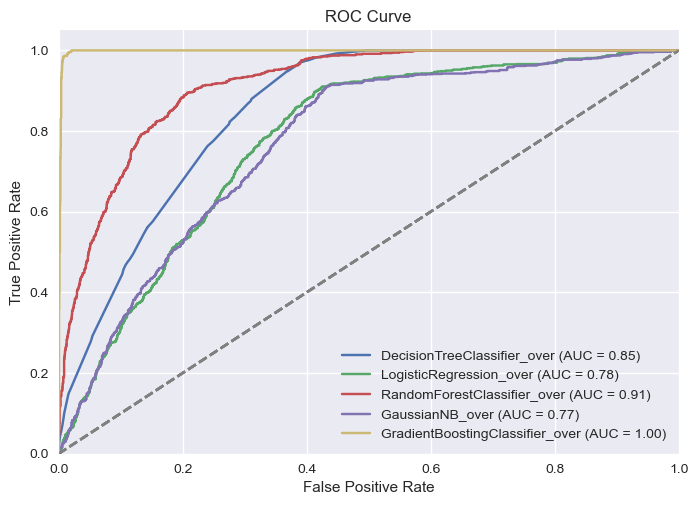

In [97]:
# Initialize models
lr_over = LogisticRegression(random_state=42)
dt_over = DecisionTreeClassifier(random_state=42)
rf_over = RandomForestClassifier(random_state=42)
gnb_over = GaussianNB()
gb_over = GradientBoostingClassifier(random_state=42)
#svm_over = SVC(probability=True)  # Set probability=True for SVC

# Define parameter grids for each model
dt_over_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_over_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_over_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_over_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

gb_over_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

#svm_over_param_grid = {
  # 'C': [0.1, 1, 10],
  # 'kernel': ['linear', 'rbf', 'poly'],
  # 'gamma': ['scale', 'auto']
#}

# Define a dictionary to map models to their respective parameter grids
param_grids = {
    'DecisionTreeClassifier_over': (DecisionTreeClassifier(random_state=42), dt_over_param_grid),
    'LogisticRegression_over': (LogisticRegression(random_state=42), lr_over_param_grid),
    'RandomForestClassifier_over': (RandomForestClassifier(random_state=42), rf_over_param_grid),
    'GaussianNB_over': (GaussianNB(), gnb_over_param_grid),
    'GradientBoostingClassifier_over': (GradientBoostingClassifier(random_state=42), gb_over_param_grid),
    #'SVC_over': (SVC(probability=True), svm_over_param_grid)
}

for i, (model_name, (model, param_grid)) in enumerate(param_grids.items()):
    #print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_over, y_train_over)
    
    
    # Use the best estimator to make predictions
    best_model = grid_search.best_estimator_
    
   # Check if the model can predict probabilities. If not, use decision function
    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(X_test_over)[:, 1]
    else:
        y_prob = best_model.decision_function(X_test_over)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # scale 0 to 1
 
    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test_over, y_prob)
    roc_auc = auc(fpr, tpr)
 
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    # Plot the random classifier line
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.legend(title='Model (AUC)', loc="lower right")
    #plt.legend(loc="lower right")
 
# Add legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
# Show the plot
plt.show()

USING VOTING CLASSIFIER TO SELECT THE BEST PERFORMING MODEL

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from tabulate import tabulate

# Initialize models
lr_over = LogisticRegression(random_state=42)
dt_over = DecisionTreeClassifier(random_state=42)
rf_over = RandomForestClassifier(random_state=42)
gnb_over = GaussianNB()
gb_over = GradientBoostingClassifier(random_state=42)
#svm_over = SVC(probability=True)  # Set probability=True for SVC

# Define parameter grids for each model
dt_over_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

lr_over_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_over_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}

gnb_over_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

gb_over_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

# Define a dictionary to map models to their respective parameter grids
param_grids = {
    'DecisionTreeClassifier_over': (DecisionTreeClassifier(random_state=42), dt_over_param_grid),
    'LogisticRegression_over': (LogisticRegression(random_state=42), lr_over_param_grid),
    'RandomForestClassifier_over': (RandomForestClassifier(random_state=42), rf_over_param_grid),
    'GaussianNB_over': (GaussianNB(), gnb_over_param_grid),
    'GradientBoostingClassifier_over': (GradientBoostingClassifier(random_state=42), gb_over_param_grid),
    #'SVC_over': (SVC(probability=True), svm_over_param_grid)
}

# Initialize lists to store results
estimators = []
model_accuracies = {}

# Perform GridSearchCV for each model
for model_name, (model, param_grid) in param_grids.items():
    #print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_over, y_train_over)
    
    
    # Use the best estimator to make predictions
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test_over)
    
   # Calculate the accuracy of the best model on the test data
    y_pred = best_model.predict(X_test_over)
    accuracy = accuracy_score(y_test_over, y_pred)
    model_accuracies[model_name] = accuracy
 
    # Add the best model to the list of estimators for the voting classifier
    estimators.append(('model_' + model_name, best_model))
 
# Create the voting classifier
voting_classifier = VotingClassifier(estimators, voting='hard')
 
# Fit the voting classifier to the training data
voting_classifier.fit(X_train_over, y_train_over)
 
# Predict on the test data and calculate the accuracy
y_pred = voting_classifier.predict(X_test_over)
voting_accuracy = accuracy_score(y_test_over, y_pred)
 
# Print the accuracies of all models
print("Model Accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")
 
# Print the accuracy of the voting classifier
#print(f"\nVoting Classifier Accuracy: {voting_accuracy:.4f}")
 
# Find the best performing model
best_model_name = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest Performing Model: {best_model_name}")

Model Accuracies:
DecisionTreeClassifier_over: 0.7869
LogisticRegression_over: 0.7325
RandomForestClassifier_over: 0.7989
GaussianNB_over: 0.7301
GradientBoostingClassifier_over: 0.9784

Best Performing Model: GradientBoostingClassifier_over


USING THE LEARNING CURVE TO DETERMINE HOW THE THE GRADIENT BOOSTING CLASSIFIER BEAHVES WITH INCREASING TRAINING DATA

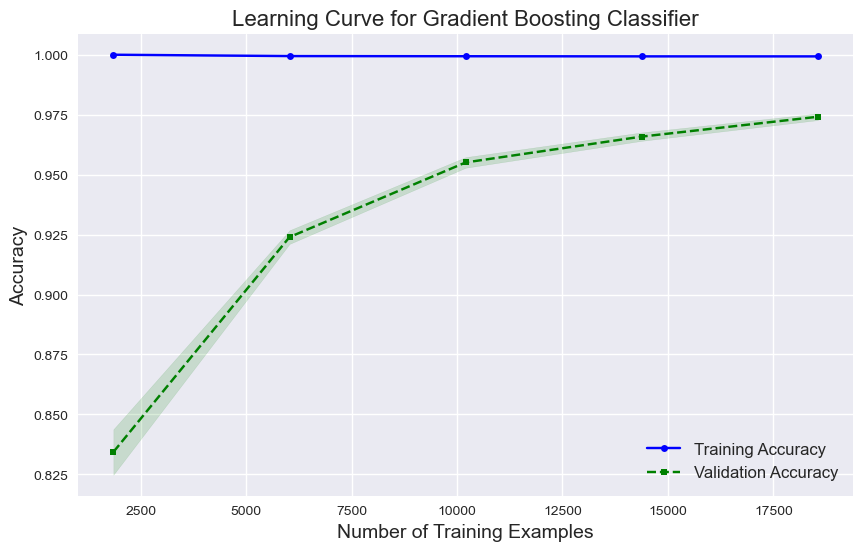

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
 
# Assuming you have already split your data into X_train, X_test, y_train, y_test
 
gb_over_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}
 
gb_over = GradientBoostingClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(gb_over, gb_over_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_over, y_train_over)
best_gb = grid_search.best_estimator_
 
# Calculate the train and test scores for different dataset sizes
train_sizes, train_scores, test_scores = learning_curve(
    best_gb, X_train_over, y_train_over, cv=5, scoring='accuracy', n_jobs=-1)
 
# Calculate the mean and standard deviation for the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
 
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
 
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
 
plt.title('Learning Curve for Gradient Boosting Classifier', fontsize=16)
plt.xlabel('Number of Training Examples', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

PLOTTING THE FEATURE IMPORTANCE SCORES FOR EACH FEATURE OBTAINED FROM THE GRADIENT BOOST CLASSIFIER

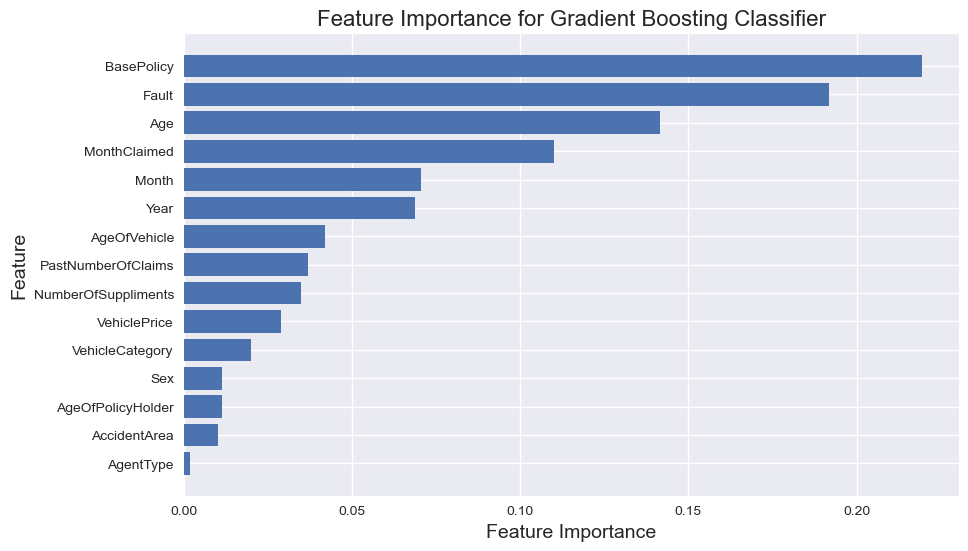

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
 
# Assuming `feature_names` is a list of feature names if X_train is a numpy array
# If X_train is a DataFrame, feature_names will be replaced with X_train.columns
feature_names = ['Month', 'AccidentArea', 'MonthClaimed', 'Sex', 'Age', 'Fault',
       'VehicleCategory', 'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'AgentType', 'NumberOfSuppliments', 'Year',
       'BasePolicy']
 
gb_over_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}
 
gb_over = GradientBoostingClassifier(random_state=42)
 
# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(gb_over, gb_over_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_over, y_train_over)
best_gb = grid_search.best_estimator_
 
# Get the feature importances from the best model
feature_importances = best_gb.feature_importances_
 
# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
 
# Check if X_train is a DataFrame and has a 'columns' attribute
if hasattr(X_train_over, 'columns'):
    sorted_features = X_train_over.columns[sorted_idx]
else:
    # If X_train is a numpy array, use the provided list of feature names
    sorted_features = np.array(feature_names)[sorted_idx]
 
sorted_importances = feature_importances[sorted_idx]
 
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_importances, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance for Gradient Boosting Classifier', fontsize=16)
plt.show()

USING LIME TO EXPLAIN THE IMPORTANCE OF THE FEATURES TO PREDICTION OF GRADIENT BOOSTING CLASSIFIER 

In [101]:
pip install lime

In [102]:
import lime
import lime.lime_tabular
import numpy as np
 
gb_over_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}
 
gb_over = GradientBoostingClassifier(random_state=42)
 
# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(gb_over, gb_over_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_over, y_train_over)
best_gb = grid_search.best_estimator_
 
# Assuming 'X_test' is your feature set and 'y_test' are the true labels
# and 'best_gb' is the fitted Gradient Boosting model
feature_names = ['Month', 'AccidentArea', 'MonthClaimed', 'Sex', 'Age', 'Fault',
       'VehicleCategory', 'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'AgentType', 'NumberOfSuppliments', 'Year',
       'BasePolicy']
 
# Create a LimeTabularExplainer
# This object generates explanations for a prediction
# Note: If you have categorical features in X_train, you should provide the 'categorical_features' parameter.
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_over),
    feature_names=feature_names,
    class_names=['Class 0', 'Class 1'], # or more class names if it's a multi-class classification
    mode='classification' # Use 'regression' if it's a regression model
)
 
# Choose an instance to explain
instance_index = 1  # for example, explain the second instance in the test set
instance = X_test_over[instance_index]
 
# Generate LIME explanation
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=best_gb.predict_proba  # Gradient Boosting classifier should have predict_proba method
)
 
# Show the explanation in a Jupyter Notebook
# For a non-notebook environment, use exp.show_in_notebook(show_all=False) or exp.save_to_file('lime_explanation.html')
exp.show_in_notebook(show_all=True)

Saving the trained model

In [103]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [104]:
from joblib import dump
dump(best_gb,'sk_model.joblib')

['sk_model.joblib']

In [105]:
from joblib import dump
#saving scaler
dump(scaler, 'scaler.joblib')

['scaler.joblib']